In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('myfuturejobs-insights/myfuturejobs_skills4.csv')
df.head()

,index,title,job_details,job_type,education,job_language,company,company_details,skills,no_skills,job_skills,no_job_skills,ignore_skills,no_ignore_skills
0,0,SALES ASSOCIATE,* Under supervision and perform duties to prov...,Permanent,4 - STPM / A Level,English,GLOBAL PSYTECH SDN BHD\n|\nCyberjaya,"Retail trade, except of motor vehicles and mot...","['Operations', 'Sales', 'Process', 'Service', ...",6,Sales; Selection,2.0,Operations; Process; Service; Product,4.0
1,1,SIGN HOUSE ADVERTISING,Kelebihan diberi kepada yang mempunyai kemahir...,Permanent,6 - Bachelor's,Others,MR DIY (M) SDN BHD\n|\nSeremban,"Advertising and market research, Printing and ...","['Adobe', 'Adobe Illustrator', 'Adobe Photosho...",4,Adobe Illustrator; Adobe Photoshop; Advertising,3.0,Adobe,1.0
2,2,MR DIY (M) SDN BHD,"Receive stock, checking & distribution item re...",Permanent,5 - Diploma / DVM,English,INTER-EXCEL ADVISORY SDN BHD\n|\nKuala Lumpur,"Retail trade, except of motor vehicles and mot...","['Operations', 'Distribution']",2,Distribution,1.0,Operations,1.0
3,3,Petugas PDK,"1. Bertanggungjawab kepada penyelia PDK, jawat...",Permanent,6 - Bachelor's,Others,IOI PLANTATION SERVICES SDN BHD\n|\nPutrajaya,"Education, Office administrative, office suppo...",[],0,NaN,0.0,NaN,0.0
4,4,MR DIY (M) SDN BHD,"Receive stock, checking & distribution item re...",Permanent,3 - SPM / O Level / SKM,English,QL Ansan Poultry Farm Sdn Bhd\n|\nPadang Serai,"Retail trade, except of motor vehicles and mot...","['Operations', 'Distribution']",2,Distribution,1.0,Operations,1.0


# Overall Data Analysis

In [3]:
df.describe()

,index,no_skills,no_job_skills,no_ignore_skills
count,19680.000000,19680.000000,19680.000000,19680.000000
mean,9839.500000,6.076778,3.646189,2.430589
std,5681.270985,7.872159,5.123603,3.074008
min,0.000000,0.000000,0.000000,0.000000
25%,4919.750000,1.000000,0.000000,0.000000
50%,9839.500000,3.000000,2.000000,1.000000
75%,14759.250000,8.000000,5.000000,3.000000
max,19679.000000,70.000000,50.000000,26.000000


In [4]:
df.describe(include='object')

,title,job_details,job_type,education,job_language,company,company_details,skills,job_skills,ignore_skills
count,19680,19680,19680,19680,19680,19680,19680,19680,14566,13862
unique,4856,3296,6,8,2,3340,2699,3450,2612,1733
top,General Worker,Sales assistants represent the direct contact ...,Permanent,3 - SPM / O Level / SKM,English,BATARAS SDN. BHD.\n|\nKota Kinabalu,"Retail trade, except of motor vehicles and mot...",[],Sales,Service
freq,128,167,15653,8065,16950,96,164,2785,380,608


## Job Type

In [5]:
df['job_type'].unique().tolist()

['Permanent',
 'Contract',
 'Apprenticeship',
 'Temporary',
 'Internship',
 'Part-time']

In [6]:
df['job_type'].value_counts(normalize=True) * 100

Permanent         79.537602
Contract          15.772358
Internship         1.371951
Part-time          1.183943
Apprenticeship     1.133130
Temporary          1.001016
Name: job_type, dtype: float64

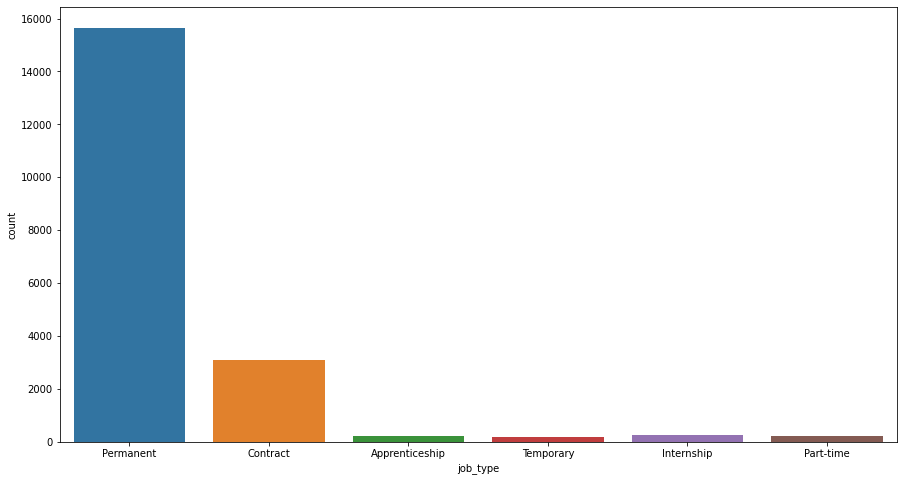

In [7]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_type', data=df);

## Education

In [8]:
educations = df['education'].unique().tolist()
educations.sort()
educations

['1 - Primary Education',
 '2 - PMR / PT3',
 '3 - SPM / O Level / SKM',
 '4 - STPM / A Level',
 '5 - Diploma / DVM',
 "6 - Bachelor's",
 "7 - Master's",
 '8 - Doctoral (PhD)']

In [9]:
df['education'].value_counts()

3 - SPM / O Level / SKM    8065
5 - Diploma / DVM          4941
6 - Bachelor's             3962
2 - PMR / PT3              1356
1 - Primary Education       741
4 - STPM / A Level          460
7 - Master's                 96
8 - Doctoral (PhD)           59
Name: education, dtype: int64

In [10]:
df['education'].value_counts(normalize=True) * 100

3 - SPM / O Level / SKM    40.980691
5 - Diploma / DVM          25.106707
6 - Bachelor's             20.132114
2 - PMR / PT3               6.890244
1 - Primary Education       3.765244
4 - STPM / A Level          2.337398
7 - Master's                0.487805
8 - Doctoral (PhD)          0.299797
Name: education, dtype: float64

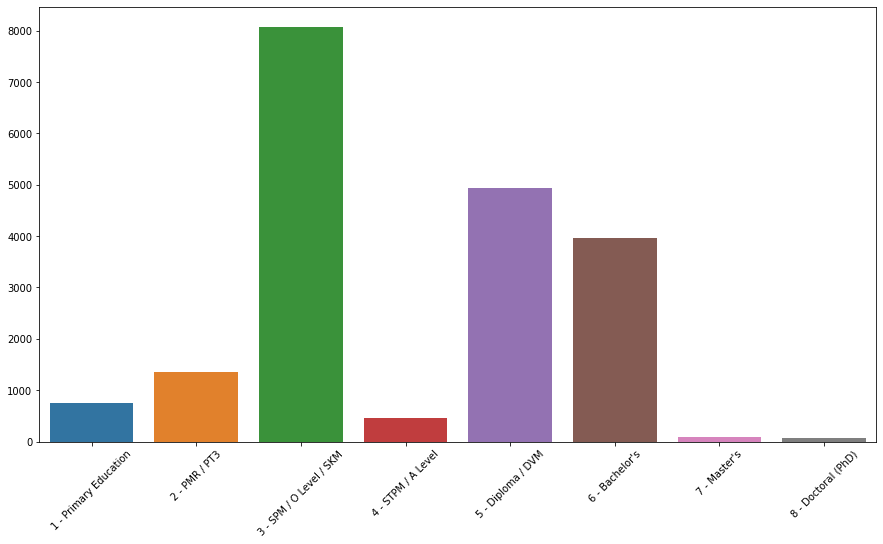

In [11]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='education', data=df, order=educations)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

## Language

In [12]:
languages = df['job_language'].unique().tolist()
languages

['English', 'Others']

In [13]:
df['job_language'].value_counts()

English    16950
Others      2730
Name: job_language, dtype: int64

In [14]:
df['job_language'].value_counts(normalize=True) * 100

English    86.128049
Others     13.871951
Name: job_language, dtype: float64

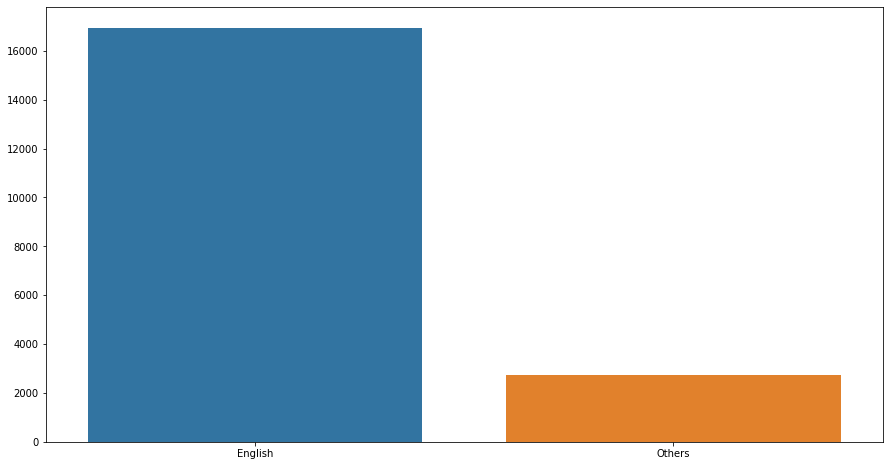

In [15]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='job_language', data=df)  
ax.set_xlabel('')
ax.set_ylabel('');

## Has Skills

In [16]:
df[['has_skills', 'job_has_skills', 'ignore_has_skills']] = [False, False, False]
df.loc[df['no_skills'] > 0, 'has_skills'] = True
df.loc[df['no_job_skills'] > 0, 'job_has_skills'] = True
df.loc[df['no_ignore_skills'] > 0, 'ignore_has_skills'] = True
df[['has_skills', 'job_has_skills', 'ignore_has_skills']].describe()

,has_skills,job_has_skills,ignore_has_skills
count,19680,19680,19680
unique,2,2,2
top,True,True,True
freq,16895,14566,13862


In [17]:
df[['has_skills', 'job_has_skills', 'ignore_has_skills']].value_counts(normalize=True) * 100

has_skills  job_has_skills  ignore_has_skills
True        True            True                 58.602642
                            False                15.411585
False       False           False                14.151423
True        False           True                 11.834350
dtype: float64

In [18]:
df['has_skills'].value_counts(normalize=True) * 100

True     85.848577
False    14.151423
Name: has_skills, dtype: float64

In [19]:
df['job_has_skills'].value_counts(normalize=True) * 100

True     74.014228
False    25.985772
Name: job_has_skills, dtype: float64

In [20]:
df['ignore_has_skills'].value_counts(normalize=True) * 100

True     70.436992
False    29.563008
Name: ignore_has_skills, dtype: float64

## Number of Skills

In [21]:
df[['no_skills', 'no_job_skills', 'no_ignore_skills']].describe()

,no_skills,no_job_skills,no_ignore_skills
count,19680.000000,19680.000000,19680.000000
mean,6.076778,3.646189,2.430589
std,7.872159,5.123603,3.074008
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,3.000000,2.000000,1.000000
75%,8.000000,5.000000,3.000000
max,70.000000,50.000000,26.000000


### All Skills

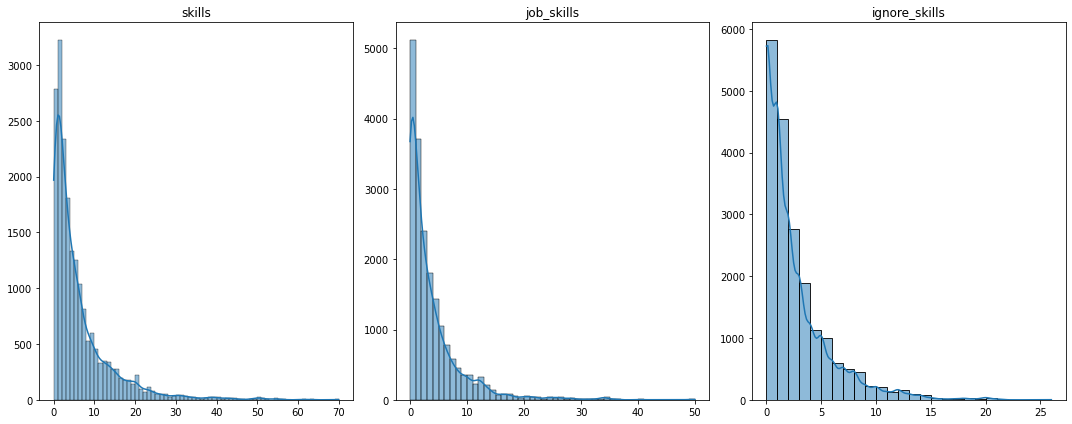

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_' + axis[i] + 'skills', data=df, kde=True, binwidth=1, ax=ax)
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

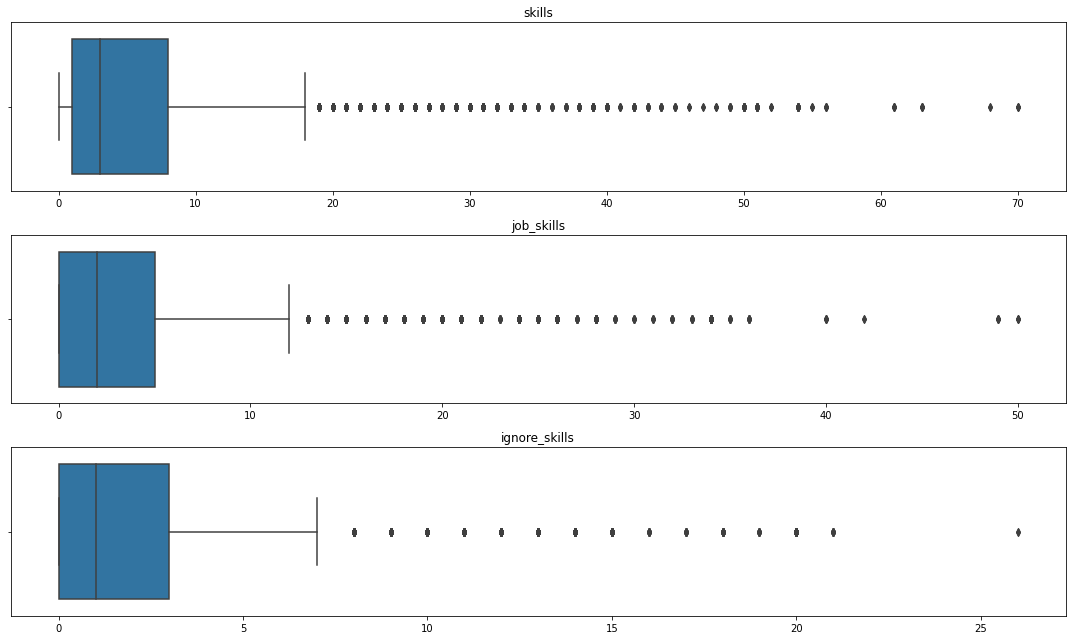

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,9))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_' + axis[i] + 'skills', data=df, ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

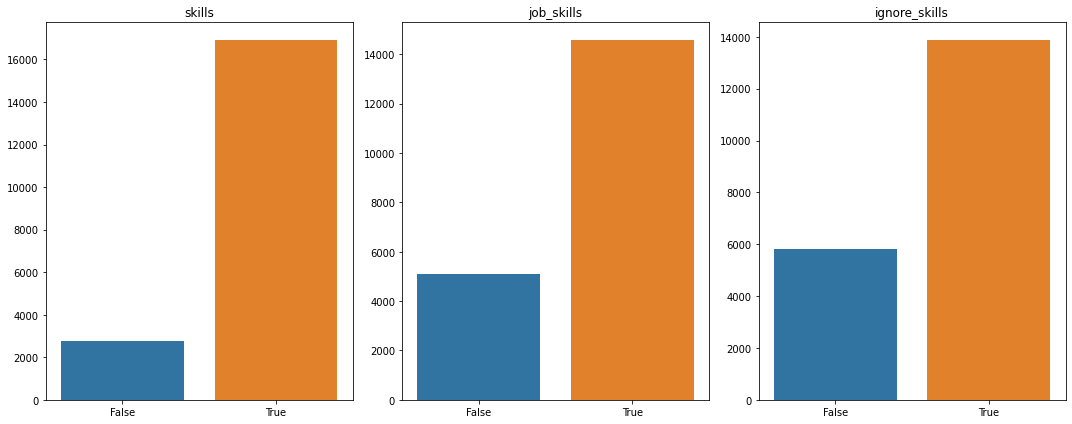

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.countplot(x=axis[i] + 'has_skills', data=df, ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

### Job Skills

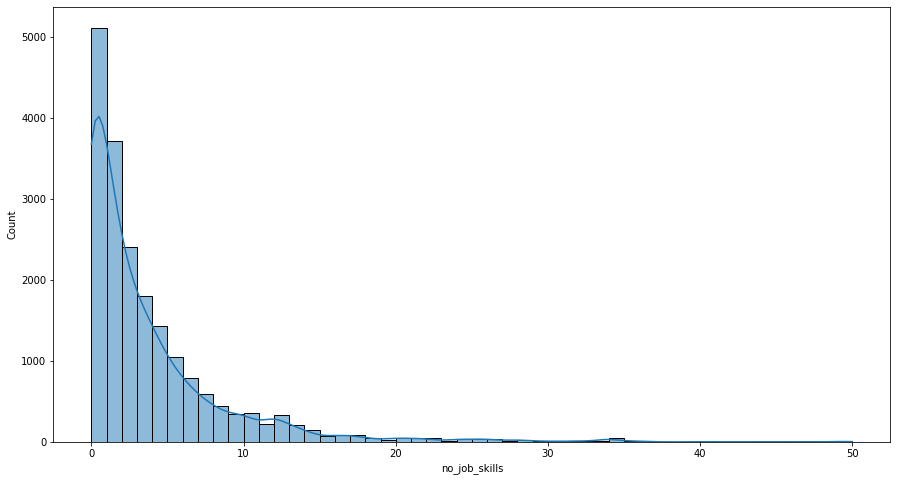

In [25]:
plt.figure(figsize=(15,8))
sns.histplot(x='no_job_skills', data=df, kde=True, binwidth=1);

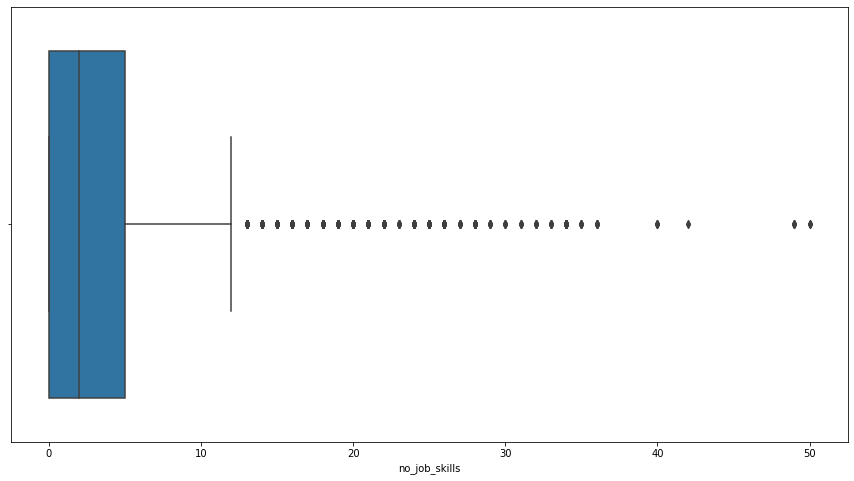

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x='no_job_skills', data=df);

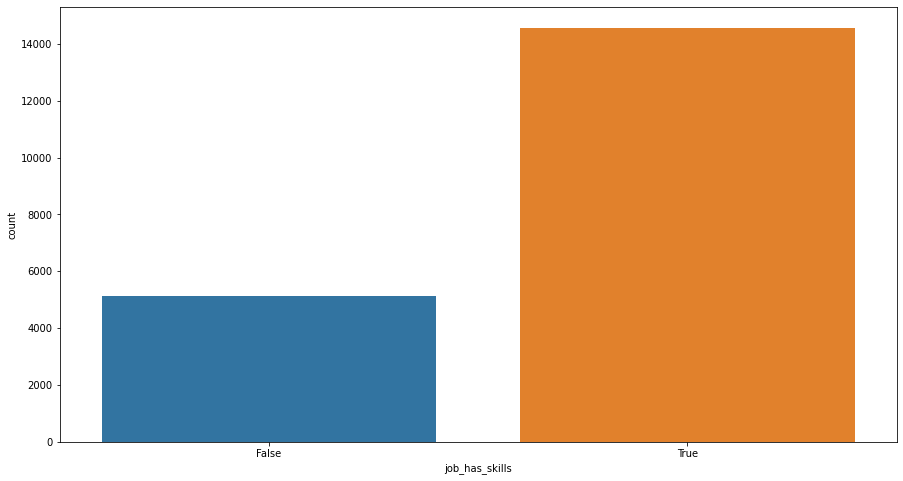

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_has_skills', data=df);

## Skills

In [28]:
def get_skill_count(df, field):
    skill_dict = {}
    for _, row in df.iterrows():
        if field == 'skills':
            skills = row[field].lstrip('[').rstrip(']').split(', ')
        else:
            try:
                skills = row[field].split('; ')
            except:
                continue
        if len(skills) > 0:
            for skill in skills:
                if field == 'skills':
                    skill = skill.strip("'")
                if skill == '':
                    continue
                if skill in skill_dict.keys():
                    skill_dict[skill] += 1
                else:
                    skill_dict[skill] = 1
    df = pd.DataFrame.from_dict(skill_dict, orient='index', columns=['count']).reset_index().sort_values(by='count', ascending=False)
    return df

In [29]:
df_all = get_skill_count(df, 'skills')
print(len(df_all))
df_all.head()

1051


,index,count
3,Service,3468
5,Product,3426
16,Management,3268
1,Sales,2600
0,Operations,2544


In [30]:
df_job = get_skill_count(df, 'job_skills')
print(len(df_job))
df_job.head()

1005


,index,count
0,Sales,2546
17,Communication,2076
29,English,1932
9,Management,1837
12,Training,1394


In [31]:
df_ignore = get_skill_count(df, 'ignore_skills')
print(len(df_ignore))
df_ignore.head()

170


,index,count
2,Service,3468
3,Product,3426
0,Operations,2544
8,Support,2530
13,Business,2484


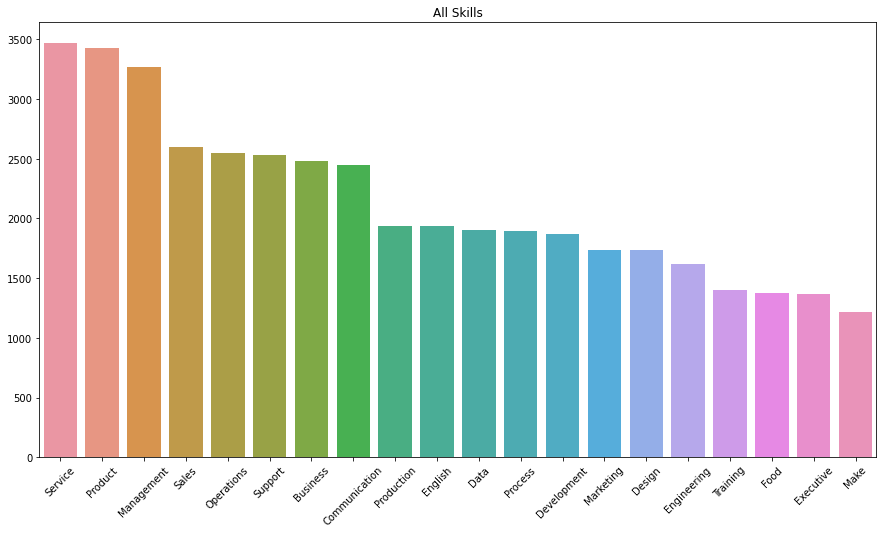

In [32]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=df_all.iloc[:20])
plt.xticks(rotation=45)
ax.set_title('All Skills')
ax.set_xlabel('')
ax.set_ylabel('');

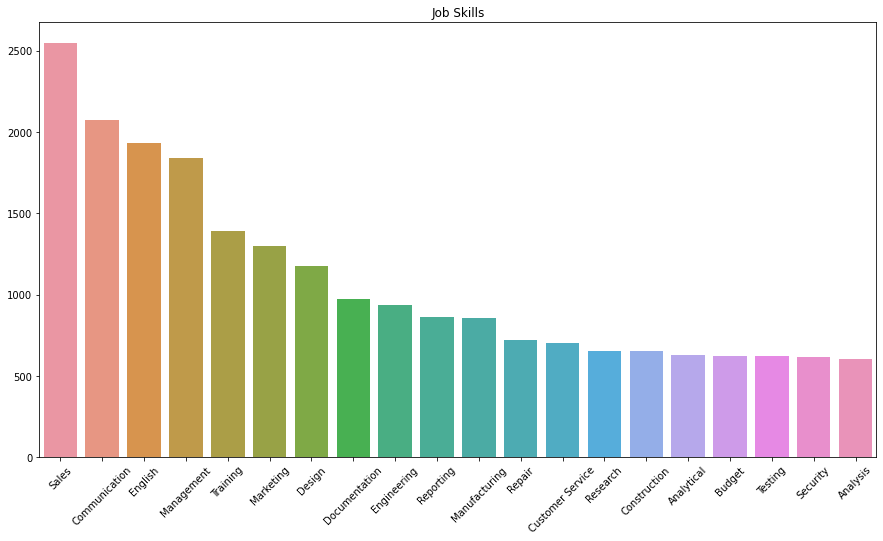

In [33]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=df_job.iloc[:20])
plt.xticks(rotation=45)
ax.set_title('Job Skills')
ax.set_xlabel('')
ax.set_ylabel('');

# Education Analysis

## Language

In [34]:
df.groupby('education')['job_language'].value_counts()

education                job_language
1 - Primary Education    English          623
                         Others           118
2 - PMR / PT3            English         1153
                         Others           203
3 - SPM / O Level / SKM  English         6955
                         Others          1110
4 - STPM / A Level       English          387
                         Others            73
5 - Diploma / DVM        English         4257
                         Others           684
6 - Bachelor's           English         3441
                         Others           521
7 - Master's             English           83
                         Others            13
8 - Doctoral (PhD)       English           51
                         Others             8
Name: job_language, dtype: int64

In [35]:
df.groupby('education')['job_language'].value_counts(normalize=True) * 100

education                job_language
1 - Primary Education    English         84.075574
                         Others          15.924426
2 - PMR / PT3            English         85.029499
                         Others          14.970501
3 - SPM / O Level / SKM  English         86.236826
                         Others          13.763174
4 - STPM / A Level       English         84.130435
                         Others          15.869565
5 - Diploma / DVM        English         86.156648
                         Others          13.843352
6 - Bachelor's           English         86.850076
                         Others          13.149924
7 - Master's             English         86.458333
                         Others          13.541667
8 - Doctoral (PhD)       English         86.440678
                         Others          13.559322
Name: job_language, dtype: float64

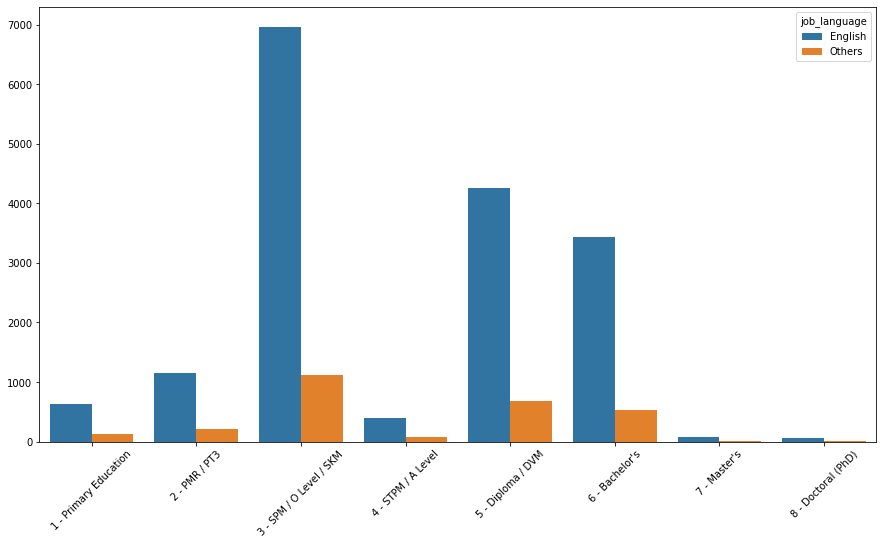

In [36]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='education', hue='job_language', data=df, order=educations)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

## Has Skills

In [37]:
df.groupby('education')[['has_skills', 'job_has_skills', 'ignore_has_skills']].describe()

has_skills                    job_has_skills         \
                             count unique   top  freq          count unique   
education                                                                     
1 - Primary Education          741      2  True   619            741      2   
2 - PMR / PT3                 1356      2  True  1168           1356      2   
3 - SPM / O Level / SKM       8065      2  True  6897           8065      2   
4 - STPM / A Level             460      2  True   378            460      2   
5 - Diploma / DVM             4941      2  True  4280           4941      2   
6 - Bachelor's                3962      2  True  3421           3962      2   
7 - Master's                    96      2  True    82             96      2   
8 - Doctoral (PhD)              59      2  True    50             59      2   

                                    ignore_has_skills                     
                          top  freq             count unique   top  freq  
education                                                                 
1 - Primary Education    True   530               741      2  True   501  
2 - PMR / PT3            True  1016              1356      2  True   929  
3 - SPM / O Level / SKM  True  5906              8065      2  True  5688  
4 - STPM / A Level       True   327               460      2  True   308  
5 - Diploma / DVM        True  3708              4941      2  True  3525  
6 - Bachelor's           True  2966              3962      2  True  2806  
7 - Master's             True    72                96      2  True    63  
8 - Doctoral (PhD)       True    41                59      2  True    42

In [38]:
df.groupby('education')['has_skills'].value_counts(normalize=True) * 100

education                has_skills
1 - Primary Education    True          83.535762
                         False         16.464238
2 - PMR / PT3            True          86.135693
                         False         13.864307
3 - SPM / O Level / SKM  True          85.517669
                         False         14.482331
4 - STPM / A Level       True          82.173913
                         False         17.826087
5 - Diploma / DVM        True          86.622141
                         False         13.377859
6 - Bachelor's           True          86.345280
                         False         13.654720
7 - Master's             True          85.416667
                         False         14.583333
8 - Doctoral (PhD)       True          84.745763
                         False         15.254237
Name: has_skills, dtype: float64

In [39]:
df.groupby('education')['job_has_skills'].value_counts(normalize=True) * 100

education                job_has_skills
1 - Primary Education    True              71.524966
                         False             28.475034
2 - PMR / PT3            True              74.926254
                         False             25.073746
3 - SPM / O Level / SKM  True              73.230006
                         False             26.769994
4 - STPM / A Level       True              71.086957
                         False             28.913043
5 - Diploma / DVM        True              75.045537
                         False             24.954463
6 - Bachelor's           True              74.861181
                         False             25.138819
7 - Master's             True              75.000000
                         False             25.000000
8 - Doctoral (PhD)       True              69.491525
                         False             30.508475
Name: job_has_skills, dtype: float64

In [40]:
df.groupby('education')['ignore_has_skills'].value_counts(normalize=True) * 100

education                ignore_has_skills
1 - Primary Education    True                 67.611336
                         False                32.388664
2 - PMR / PT3            True                 68.510324
                         False                31.489676
3 - SPM / O Level / SKM  True                 70.526968
                         False                29.473032
4 - STPM / A Level       True                 66.956522
                         False                33.043478
5 - Diploma / DVM        True                 71.341834
                         False                28.658166
6 - Bachelor's           True                 70.822817
                         False                29.177183
7 - Master's             True                 65.625000
                         False                34.375000
8 - Doctoral (PhD)       True                 71.186441
                         False                28.813559
Name: ignore_has_skills, dtype: float64

## Number of Skills

In [41]:
df.groupby('education')['no_skills'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
1 - Primary Education,741.0,5.587045,7.555527,0.0,1.0,3.0,7.0,51.0
2 - PMR / PT3,1356.0,5.691003,7.201657,0.0,1.0,3.0,7.0,54.0
3 - SPM / O Level / SKM,8065.0,6.047241,7.826119,0.0,1.0,3.0,8.0,70.0
4 - STPM / A Level,460.0,6.065217,7.943982,0.0,1.0,3.0,8.0,54.0
5 - Diploma / DVM,4941.0,6.106659,7.849480,0.0,1.0,3.0,8.0,70.0
6 - Bachelor's,3962.0,6.359414,8.276132,0.0,1.0,4.0,8.0,70.0
7 - Master's,96.0,5.166667,7.397961,0.0,1.0,3.0,6.0,45.0
8 - Doctoral (PhD),59.0,5.220339,6.464939,0.0,1.0,3.0,6.5,30.0


In [42]:
df.groupby('education')['no_job_skills'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
1 - Primary Education,741.0,3.333333,4.855850,0.0,0.00,2.0,4.0,34.0
2 - PMR / PT3,1356.0,3.387906,4.634856,0.0,0.00,2.0,4.0,36.0
3 - SPM / O Level / SKM,8065.0,3.614135,5.093803,0.0,0.00,2.0,5.0,50.0
4 - STPM / A Level,460.0,3.734783,5.271216,0.0,0.00,2.0,5.0,34.0
5 - Diploma / DVM,4941.0,3.655940,5.096063,0.0,1.00,2.0,5.0,50.0
6 - Bachelor's,3962.0,3.859414,5.414705,0.0,0.00,2.0,5.0,50.0
7 - Master's,96.0,3.072917,4.957174,0.0,0.75,1.0,4.0,33.0
8 - Doctoral (PhD),59.0,3.000000,3.904021,0.0,0.00,2.0,4.0,16.0


In [43]:
df.groupby('education')['no_ignore_skills'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
1 - Primary Education,741.0,2.253711,2.994658,0.0,0.0,1.0,3.0,20.0
2 - PMR / PT3,1356.0,2.303097,2.909258,0.0,0.0,1.0,3.0,20.0
3 - SPM / O Level / SKM,8065.0,2.433106,3.058745,0.0,0.0,1.0,3.0,26.0
4 - STPM / A Level,460.0,2.330435,2.977685,0.0,0.0,1.0,3.0,20.0
5 - Diploma / DVM,4941.0,2.450718,3.081197,0.0,0.0,1.0,3.0,26.0
6 - Bachelor's,3962.0,2.500000,3.185762,0.0,0.0,1.0,3.0,21.0
7 - Master's,96.0,2.093750,2.683588,0.0,0.0,1.0,3.0,13.0
8 - Doctoral (PhD),59.0,2.220339,2.841004,0.0,0.0,1.0,3.0,14.0


### All Skills

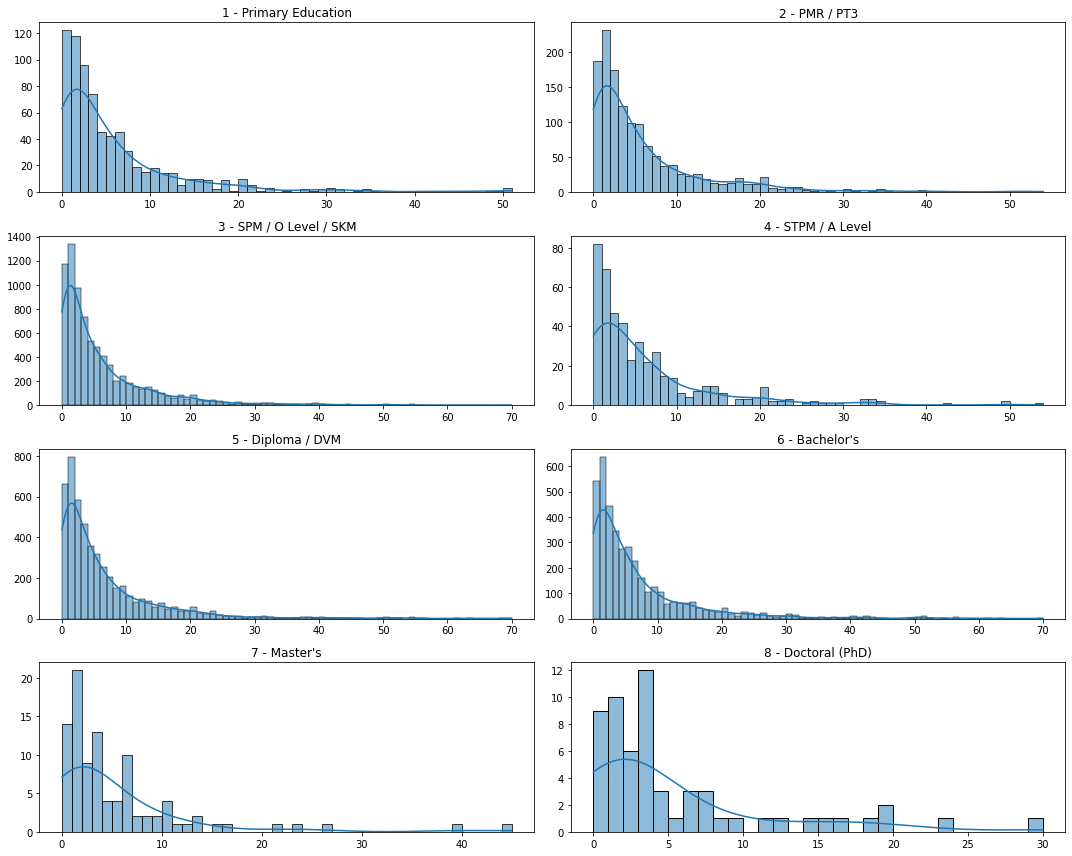

In [44]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_skills', data=df.loc[df['education'] == educations[i]], kde=True, binwidth=1, ax=ax)
    ax.set_title(educations[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

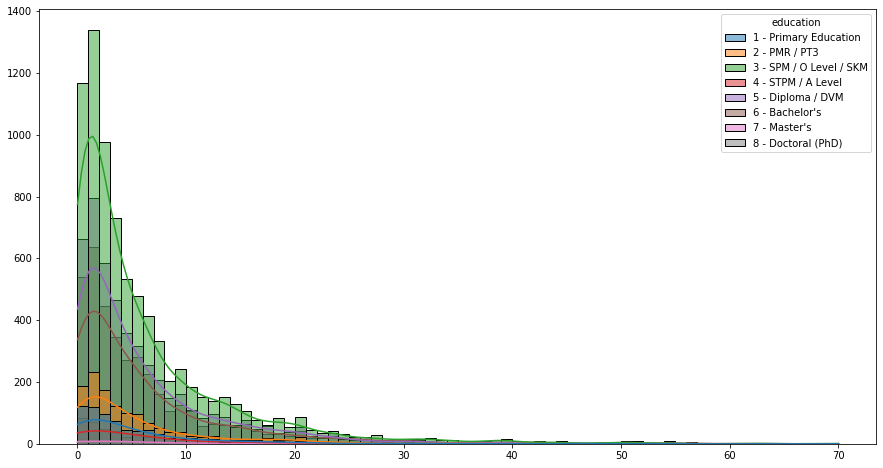

In [45]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x='no_skills', hue='education', data=df, kde=True, binwidth=1, hue_order=educations)
ax.set_xlabel('')
ax.set_ylabel('');

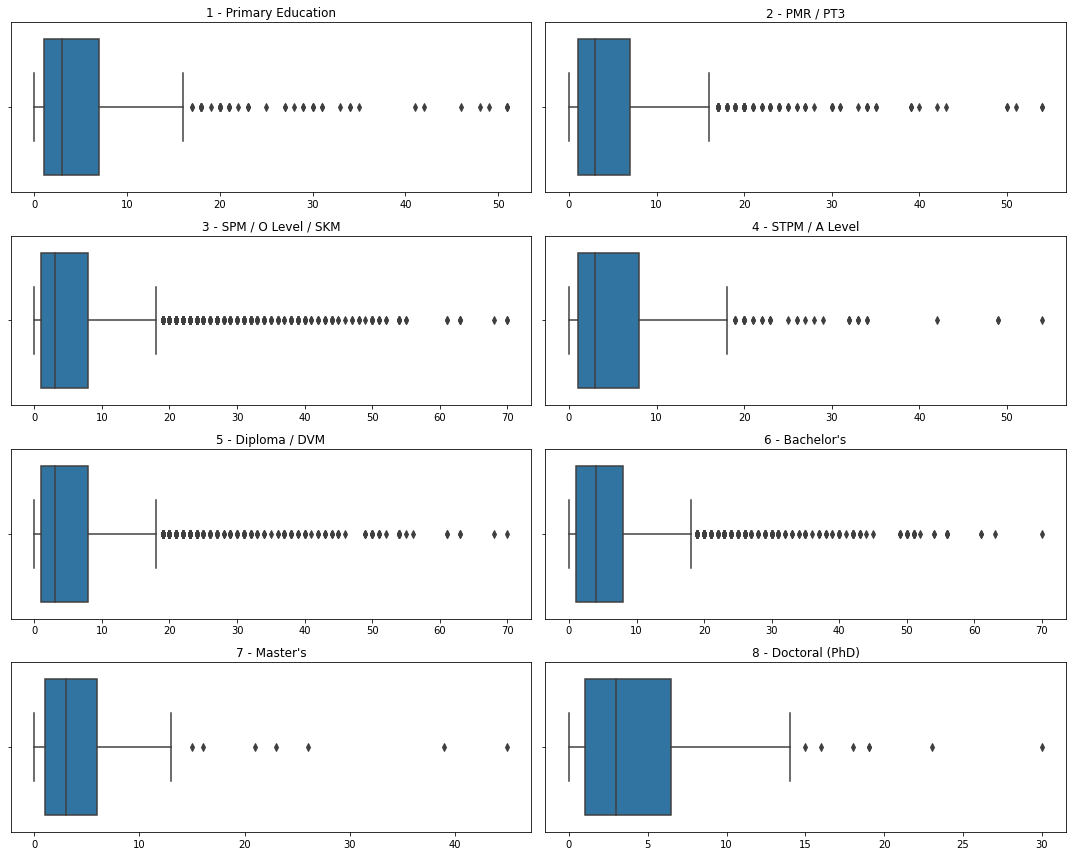

In [46]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_skills', data=df.loc[df['education'] == educations[i]], ax=ax)
    ax.set_title(educations[i])
    ax.set_xlabel('')

fig.tight_layout();

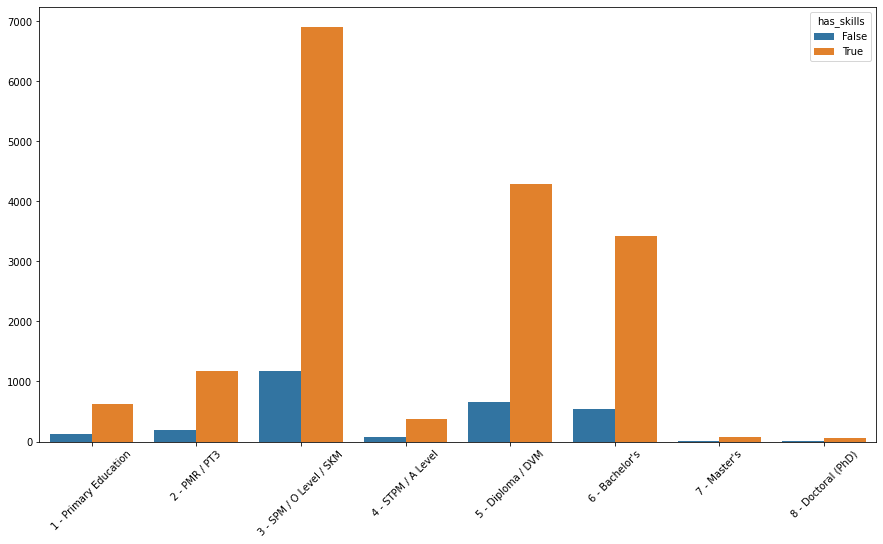

In [47]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='education', hue='has_skills', data=df, order=educations)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

### Job Skills

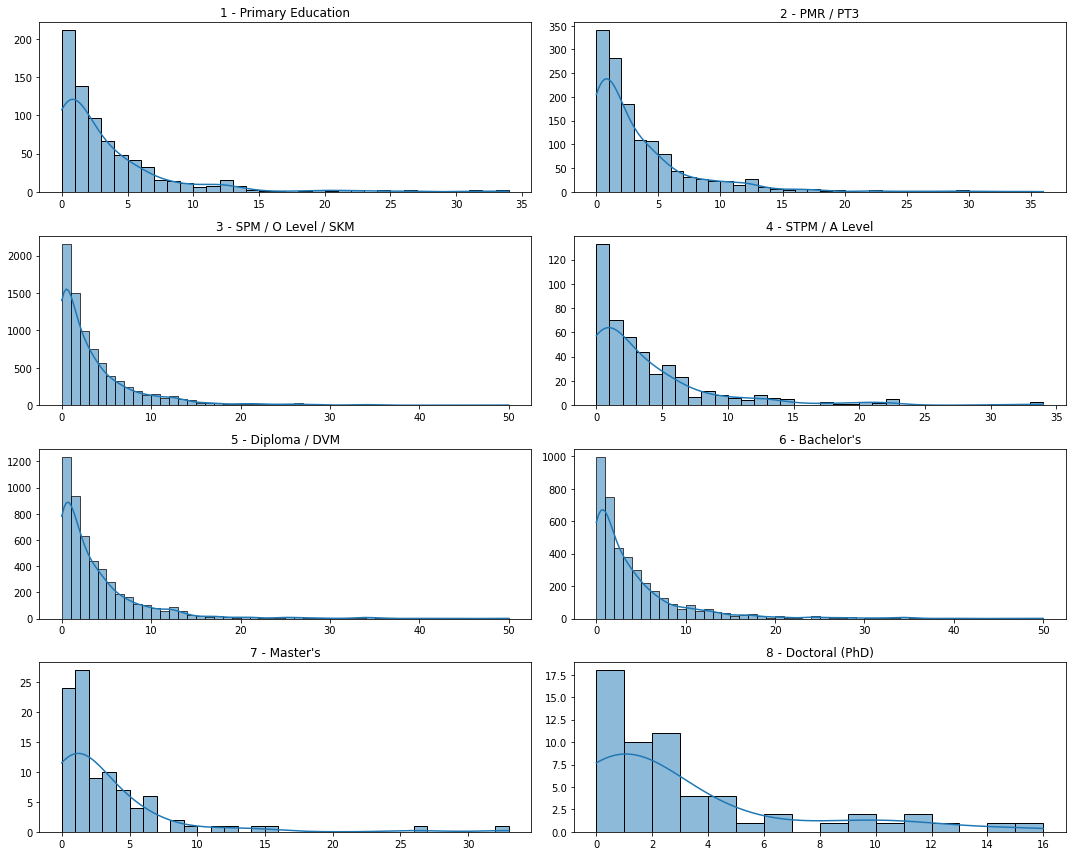

In [48]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_job_skills', data=df.loc[df['education'] == educations[i]], kde=True, binwidth=1, ax=ax)
    ax.set_title(educations[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

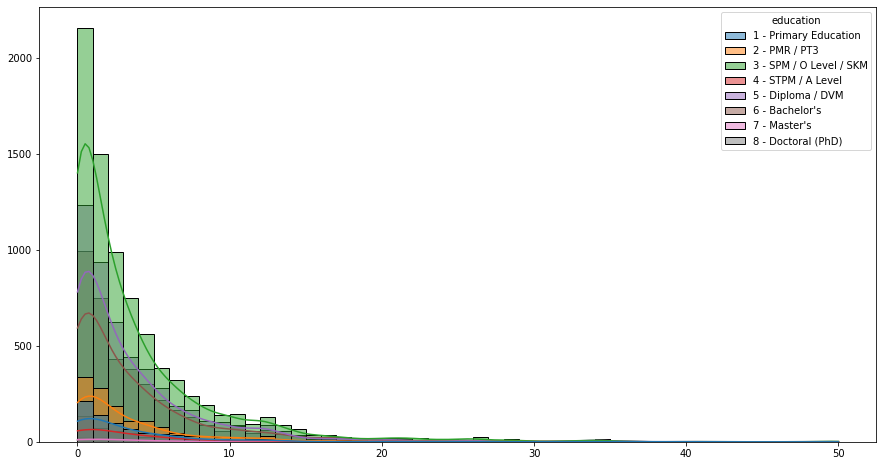

In [49]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x='no_job_skills', hue='education', data=df, kde=True, binwidth=1, hue_order=educations)
ax.set_xlabel('')
ax.set_ylabel('');

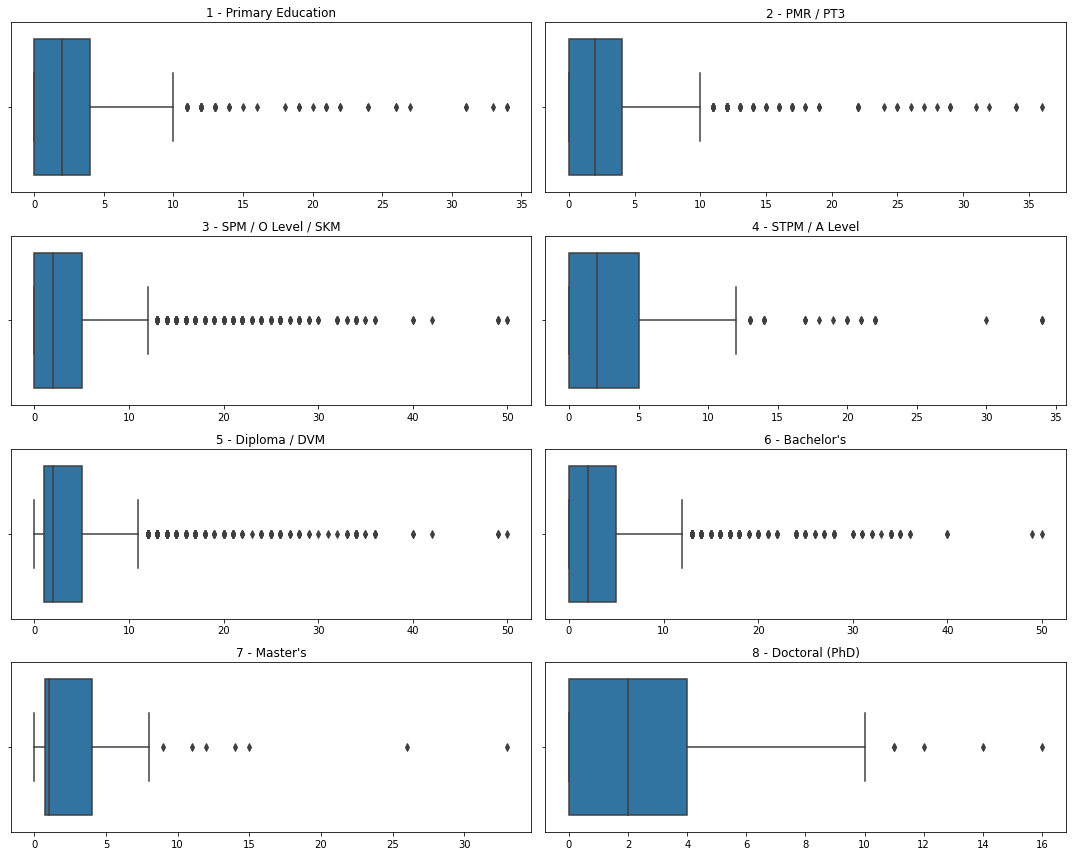

In [50]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_job_skills', data=df.loc[df['education'] == educations[i]], ax=ax)
    ax.set_title(educations[i])
    ax.set_xlabel('')

fig.tight_layout();

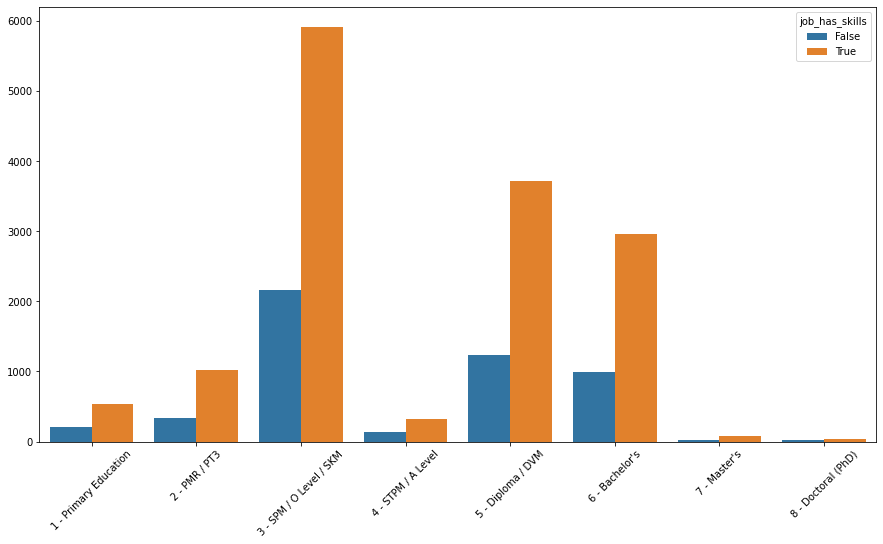

In [51]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='education', hue='job_has_skills', data=df, order=educations)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

## Skills

### All Skills

In [52]:
edu_skills = {}

for edu in educations:
    edu_skills[edu] = get_skill_count(df.loc[df['education'] == edu], 'skills')

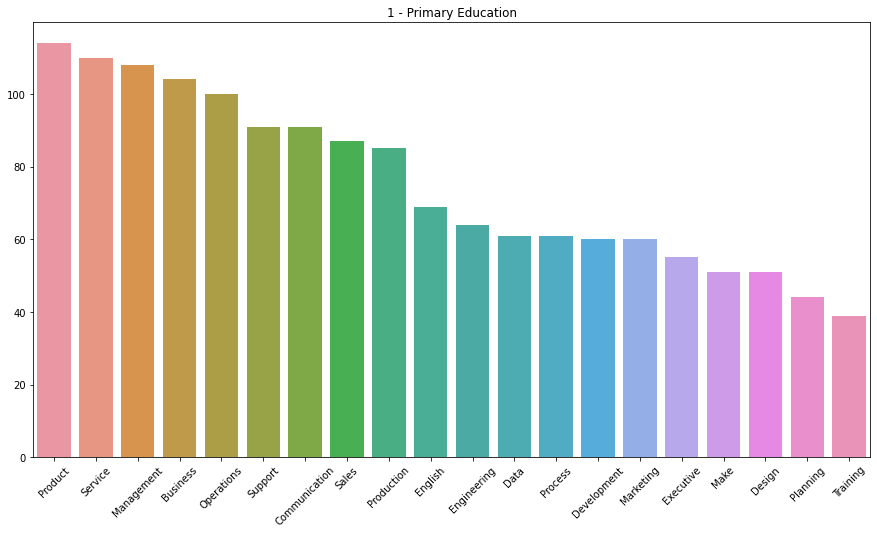

In [53]:
edu = educations[0]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

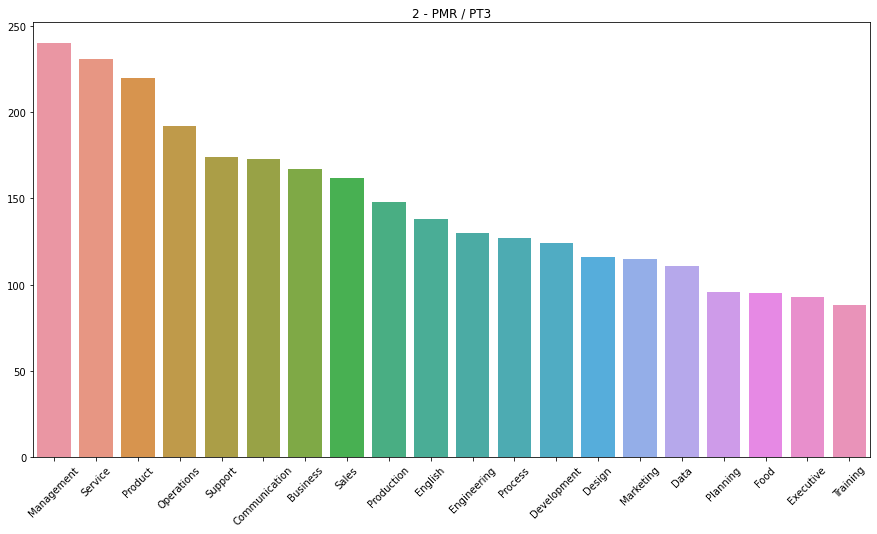

In [54]:
edu = educations[1]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

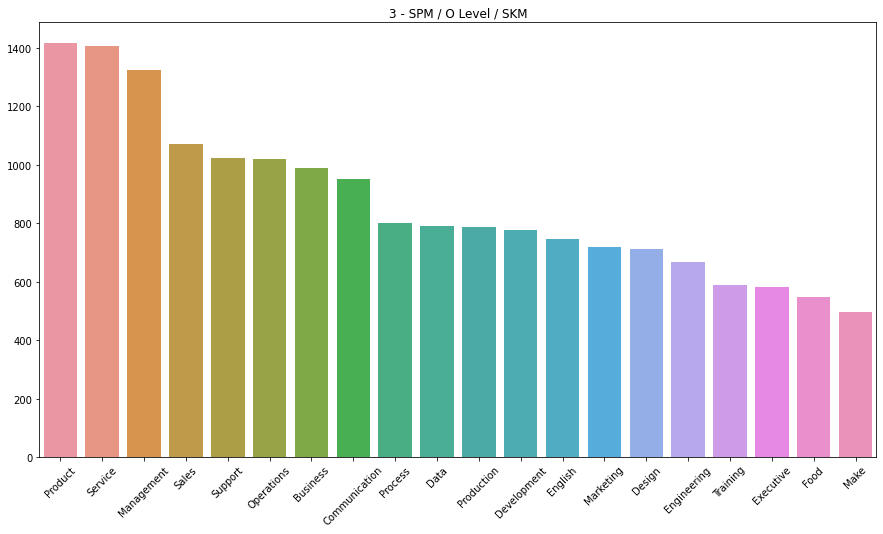

In [55]:
edu = educations[2]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

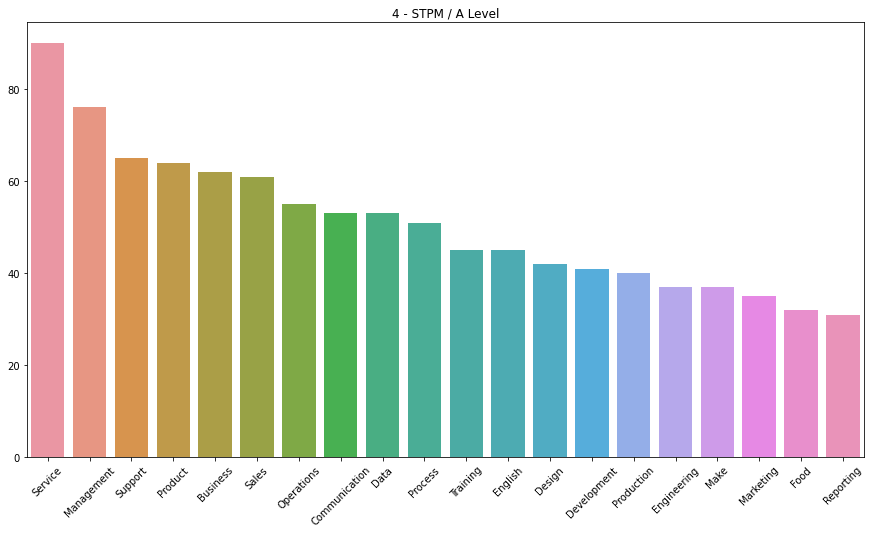

In [56]:
edu = educations[3]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

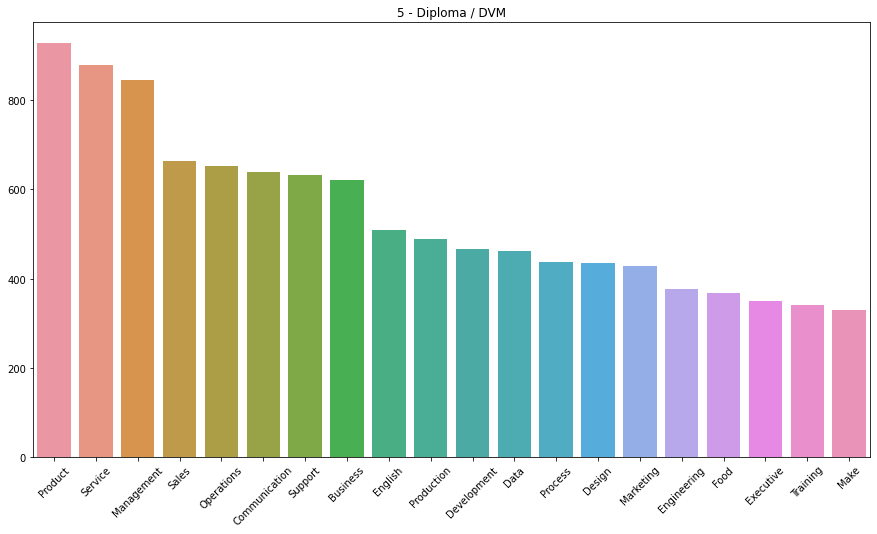

In [57]:
edu = educations[4]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

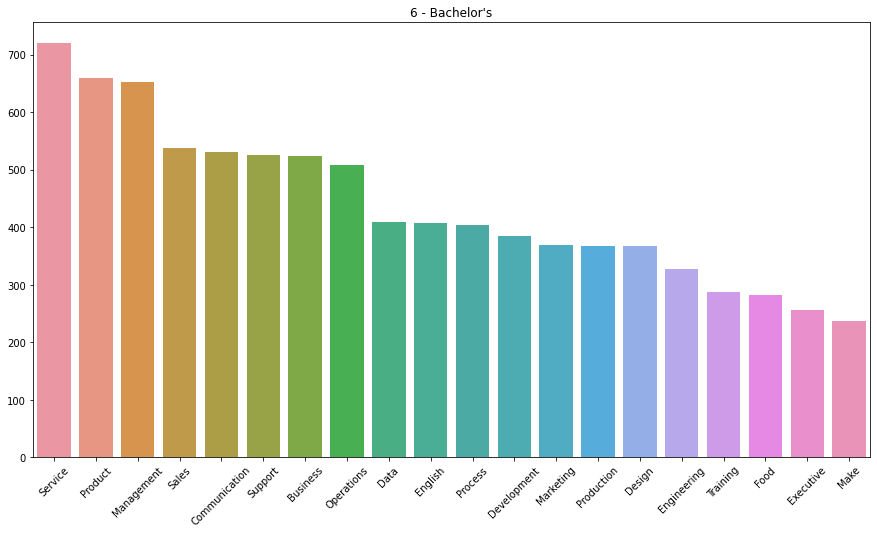

In [58]:
edu = educations[5]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

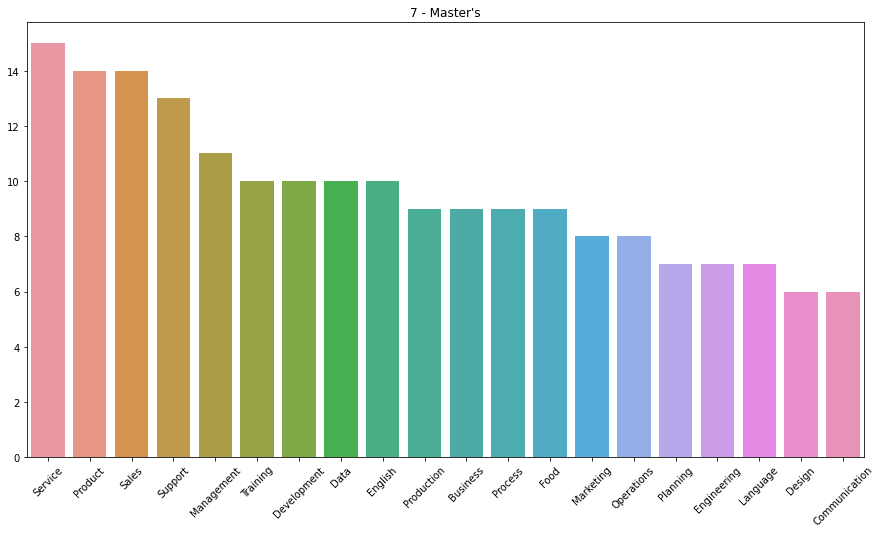

In [59]:
edu = educations[6]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

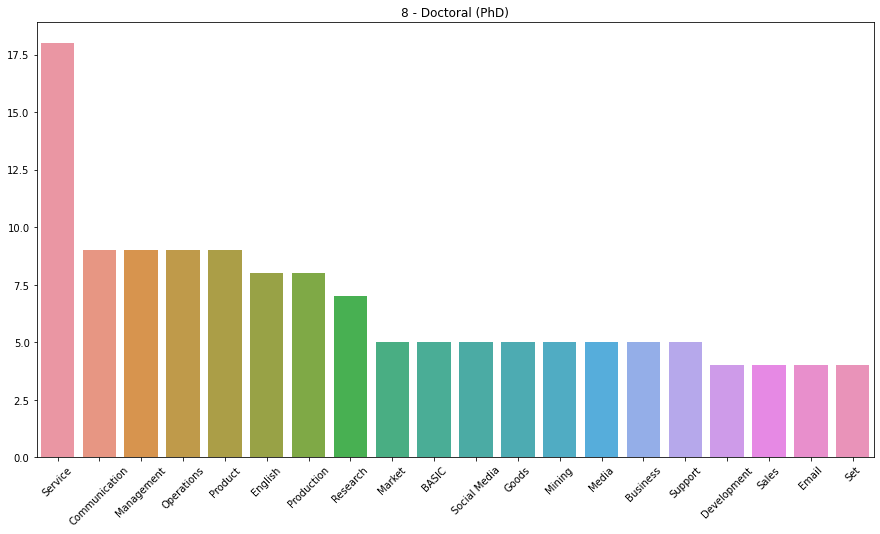

In [60]:
edu = educations[7]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

### Job Skills

In [61]:
edu_skills = {}

for edu in educations:
    edu_skills[edu] = get_skill_count(df.loc[df['education'] == edu], 'job_skills')

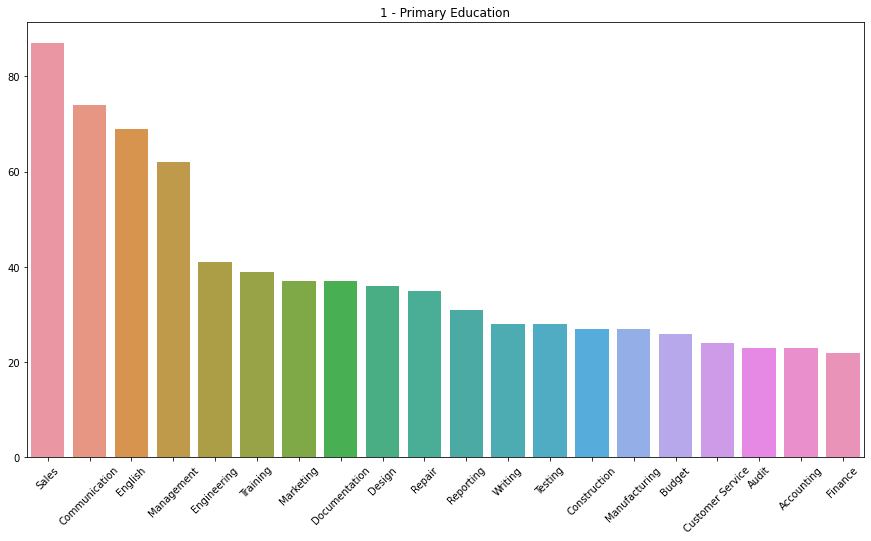

In [62]:
edu = educations[0]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

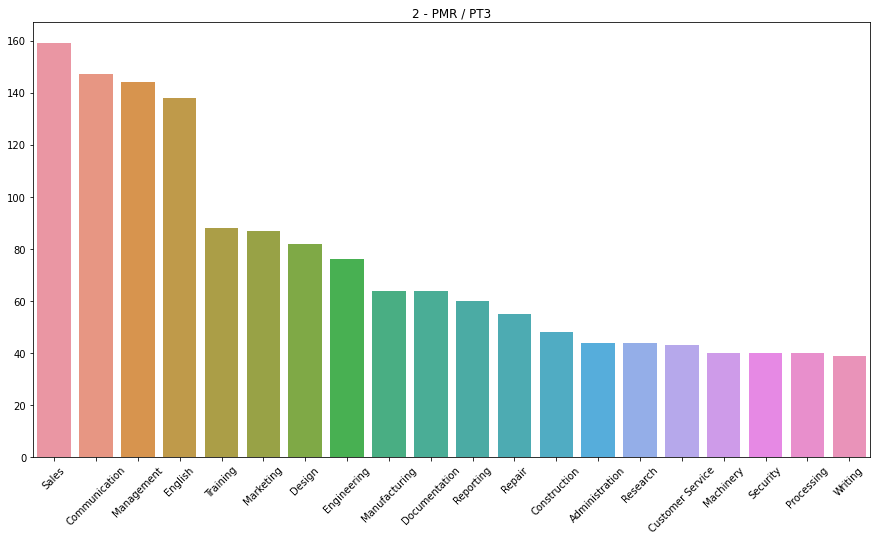

In [63]:
edu = educations[1]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

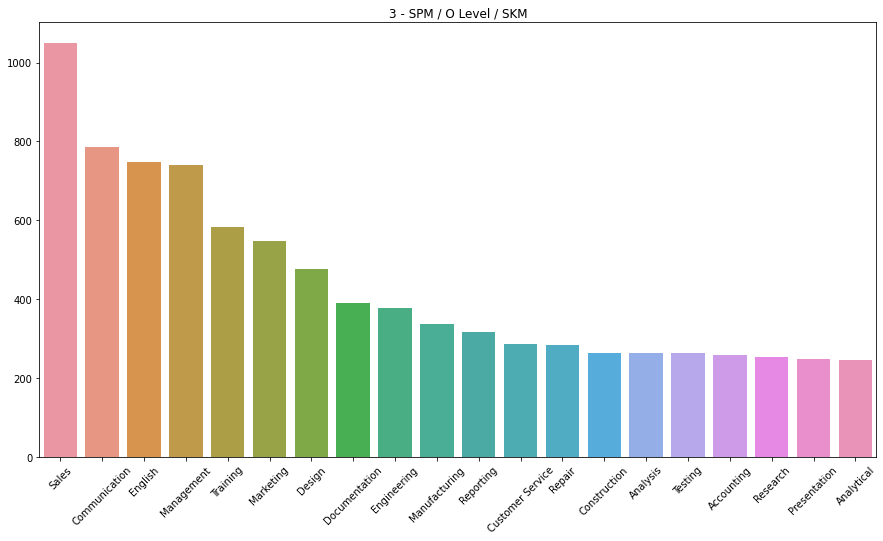

In [64]:
edu = educations[2]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

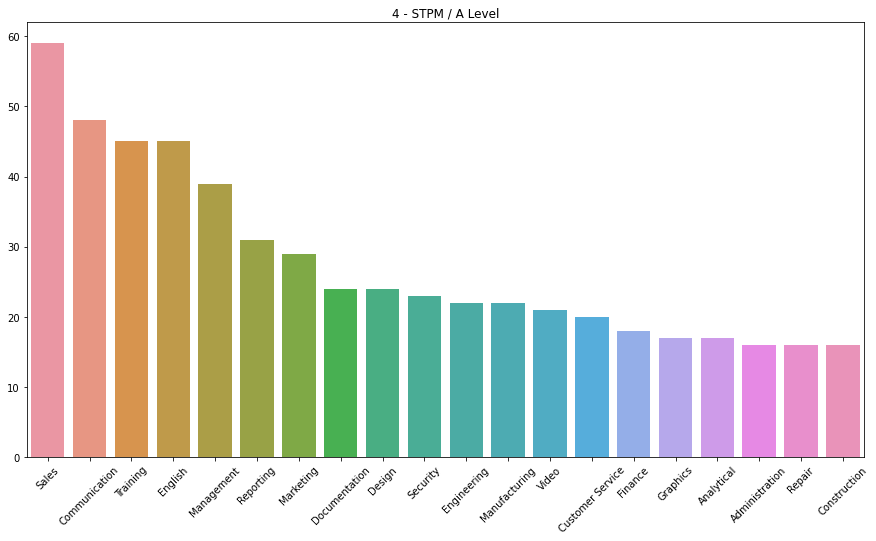

In [65]:
edu = educations[3]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

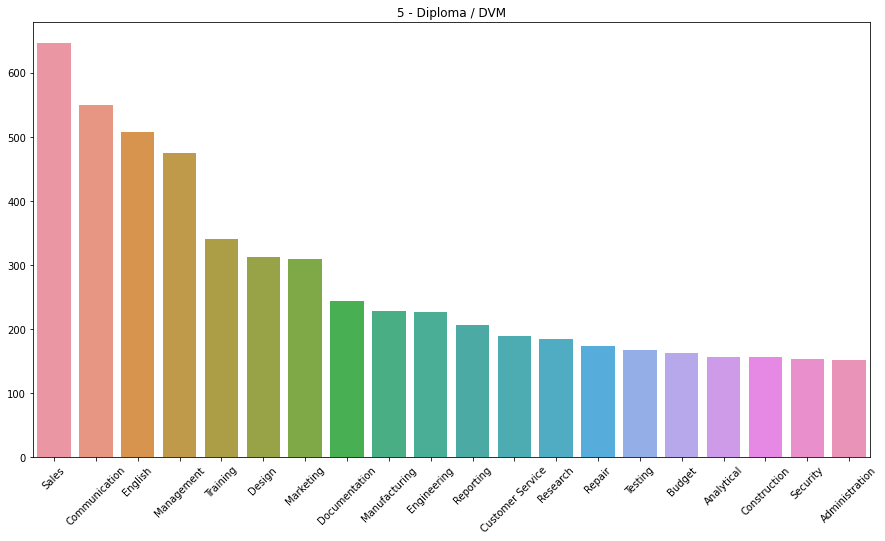

In [66]:
edu = educations[4]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

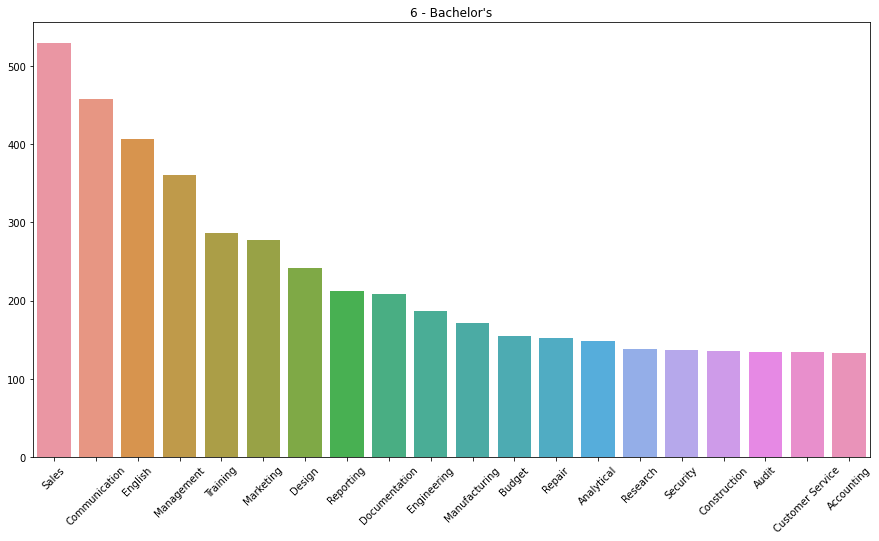

In [67]:
edu = educations[5]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

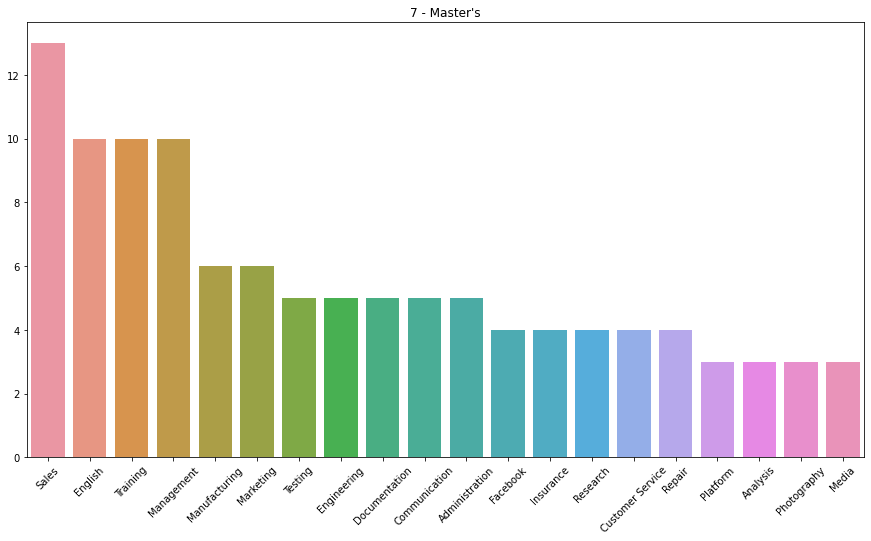

In [68]:
edu = educations[6]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

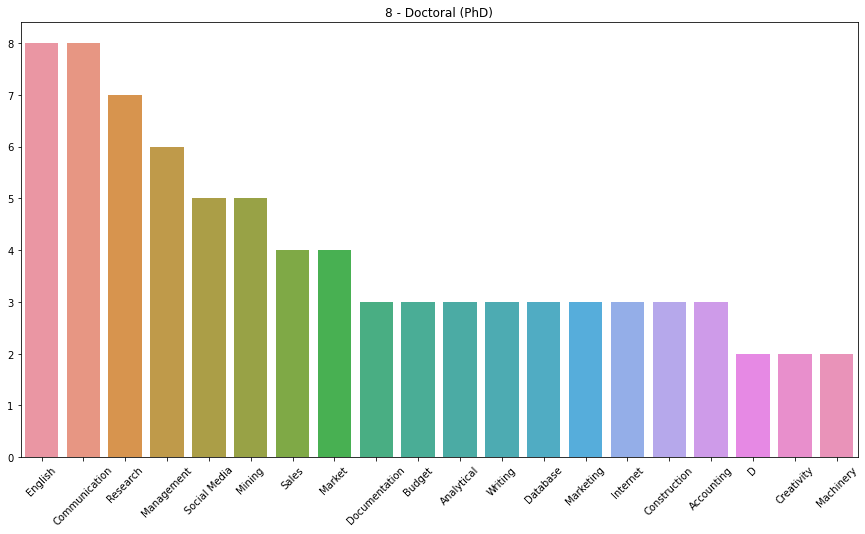

In [69]:
edu = educations[7]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=edu_skills[edu].iloc[:20])
ax.set_title(edu)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

# Language Analysis

## Education

In [70]:
df.groupby('job_language')['education'].value_counts(normalize=True) * 100

job_language  education              
English       3 - SPM / O Level / SKM    41.032448
              5 - Diploma / DVM          25.115044
              6 - Bachelor's             20.300885
              2 - PMR / PT3               6.802360
              1 - Primary Education       3.675516
              4 - STPM / A Level          2.283186
              7 - Master's                0.489676
              8 - Doctoral (PhD)          0.300885
Others        3 - SPM / O Level / SKM    40.659341
              5 - Diploma / DVM          25.054945
              6 - Bachelor's             19.084249
              2 - PMR / PT3               7.435897
              1 - Primary Education       4.322344
              4 - STPM / A Level          2.673993
              7 - Master's                0.476190
              8 - Doctoral (PhD)          0.293040
Name: education, dtype: float64

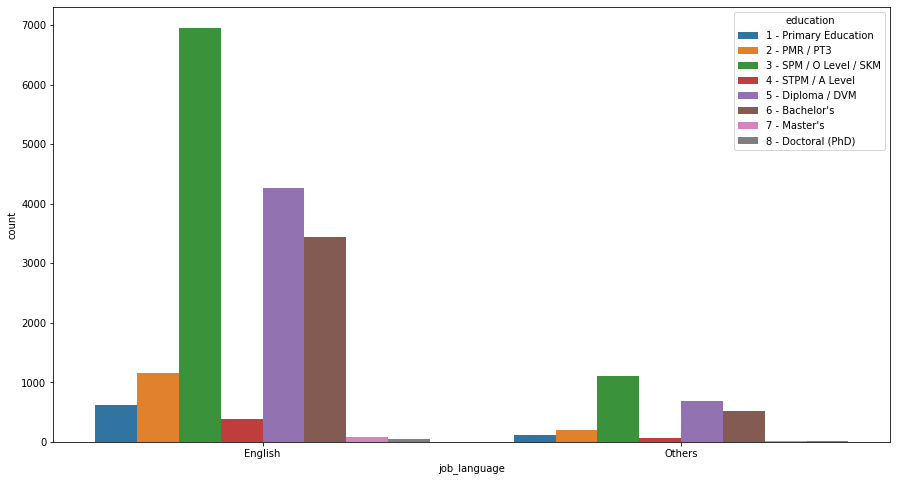

In [71]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_language', hue='education', data=df, hue_order=educations);

## Has Skills

In [72]:
df.groupby('job_language')[['has_skills', 'job_has_skills', 'ignore_has_skills']].describe()

has_skills                      job_has_skills                \
                  count unique    top   freq          count unique    top   
job_language                                                                
English           16950      2   True  15614          16950      2   True   
Others             2730      2  False   1449           2730      2  False   

                    ignore_has_skills                       
               freq             count unique    top   freq  
job_language                                                
English       13578             16950      2   True  13234  
Others         1742              2730      2  False   2102

In [73]:
df.groupby('job_language')['has_skills'].value_counts(normalize=True) * 100

job_language  has_skills
English       True          92.117994
              False          7.882006
Others        False         53.076923
              True          46.923077
Name: has_skills, dtype: float64

In [74]:
df.groupby('job_language')['job_has_skills'].value_counts(normalize=True) * 100

job_language  job_has_skills
English       True              80.106195
              False             19.893805
Others        False             63.809524
              True              36.190476
Name: job_has_skills, dtype: float64

In [75]:
df.groupby('job_language')['ignore_has_skills'].value_counts(normalize=True) * 100

job_language  ignore_has_skills
English       True                 78.076696
              False                21.923304
Others        False                76.996337
              True                 23.003663
Name: ignore_has_skills, dtype: float64

## Number of Skills

In [76]:
df.groupby('job_language')['no_skills'].describe()

,count,mean,std,min,25%,50%,75%,max
job_language,,,,,,,,
English,16950.0,6.913038,8.160580,0.0,2.0,4.0,9.0,70.0
Others,2730.0,0.884615,1.400761,0.0,0.0,0.0,1.0,12.0


In [77]:
df.groupby('job_language')['no_job_skills'].describe()

,count,mean,std,min,25%,50%,75%,max
job_language,,,,,,,,
English,16950.0,4.138643,5.344789,0.0,1.0,2.0,5.0,50.0
Others,2730.0,0.588645,1.010942,0.0,0.0,0.0,1.0,6.0


In [78]:
df.groupby('job_language')['no_ignore_skills'].describe()

,count,mean,std,min,25%,50%,75%,max
job_language,,,,,,,,
English,16950.0,2.774395,3.170935,0.0,1.0,2.0,4.0,26.0
Others,2730.0,0.295971,0.633398,0.0,0.0,0.0,0.0,6.0


### All Skills

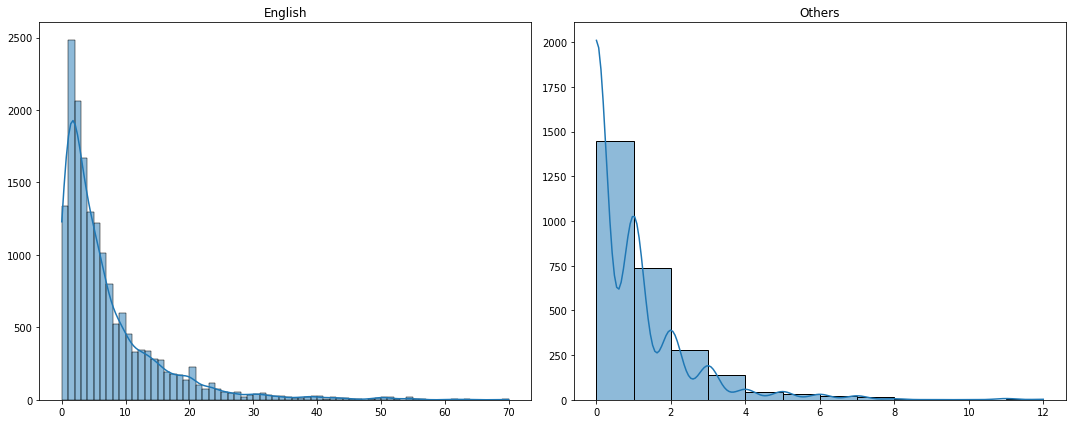

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_skills', data=df.loc[df['job_language'] == languages[i]], kde=True, binwidth=1, ax=ax)
    ax.set_title(languages[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

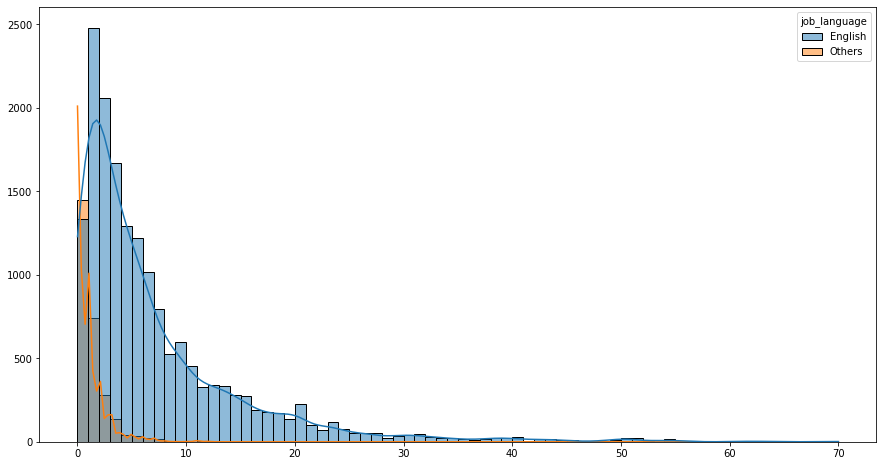

In [80]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x='no_skills', hue='job_language', data=df, kde=True, binwidth=1, hue_order=languages)
ax.set_xlabel('')
ax.set_ylabel('');

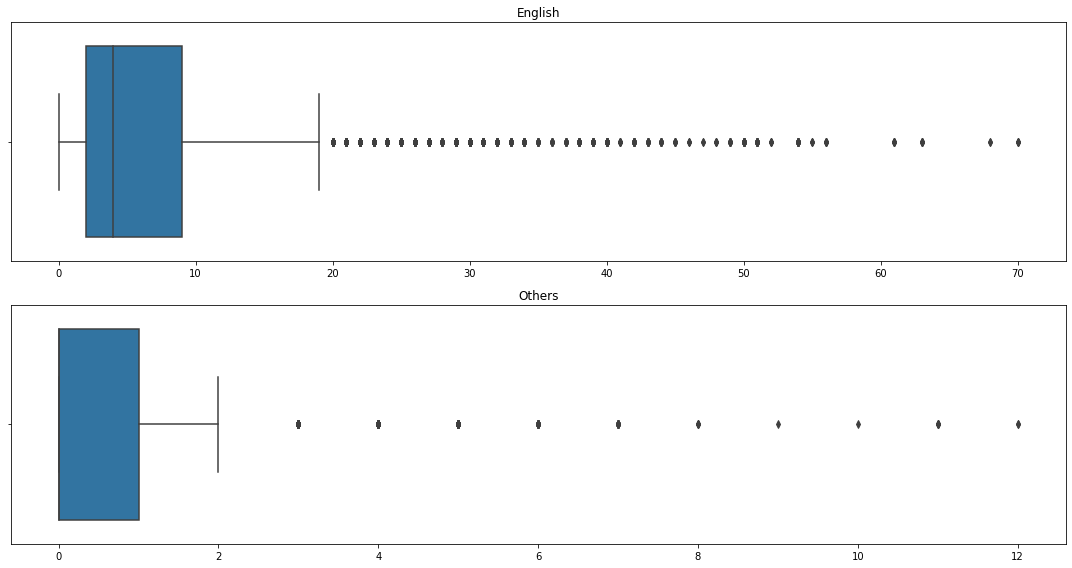

In [81]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8))

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_skills', data=df.loc[df['job_language'] == languages[i]], ax=ax)
    ax.set_title(languages[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

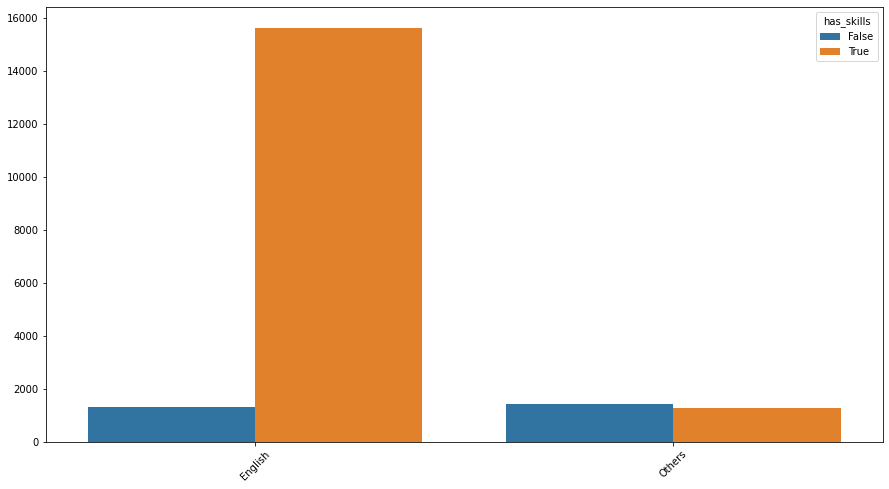

In [82]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='job_language', hue='has_skills', data=df, order=languages)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

### Job Skills

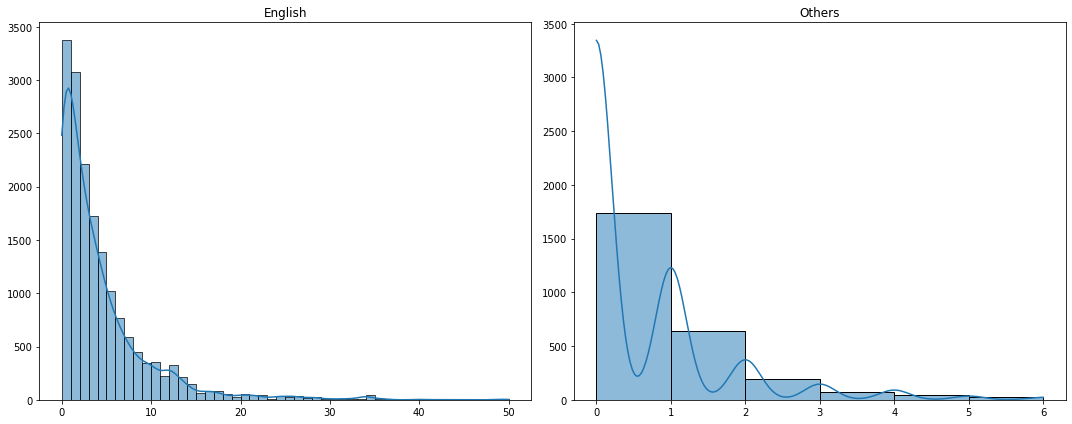

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_job_skills', data=df.loc[df['job_language'] == languages[i]], kde=True, binwidth=1, ax=ax)
    ax.set_title(languages[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

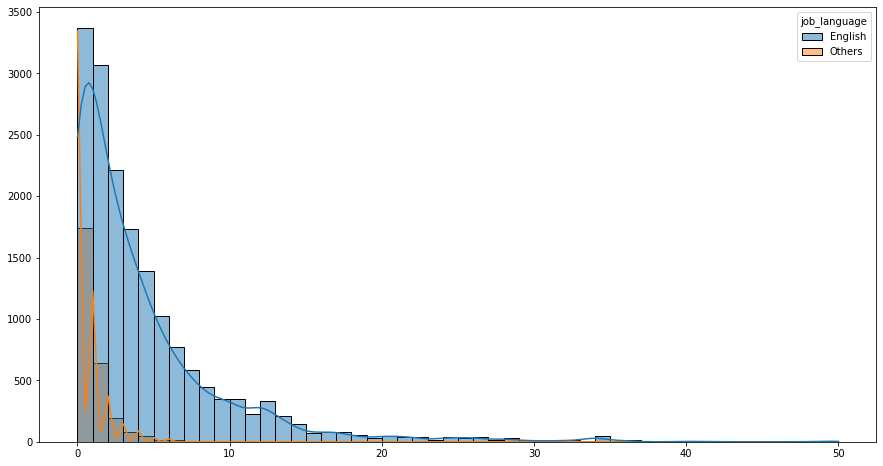

In [84]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x='no_job_skills', hue='job_language', data=df, kde=True, binwidth=1, hue_order=languages)
ax.set_xlabel('')
ax.set_ylabel('');

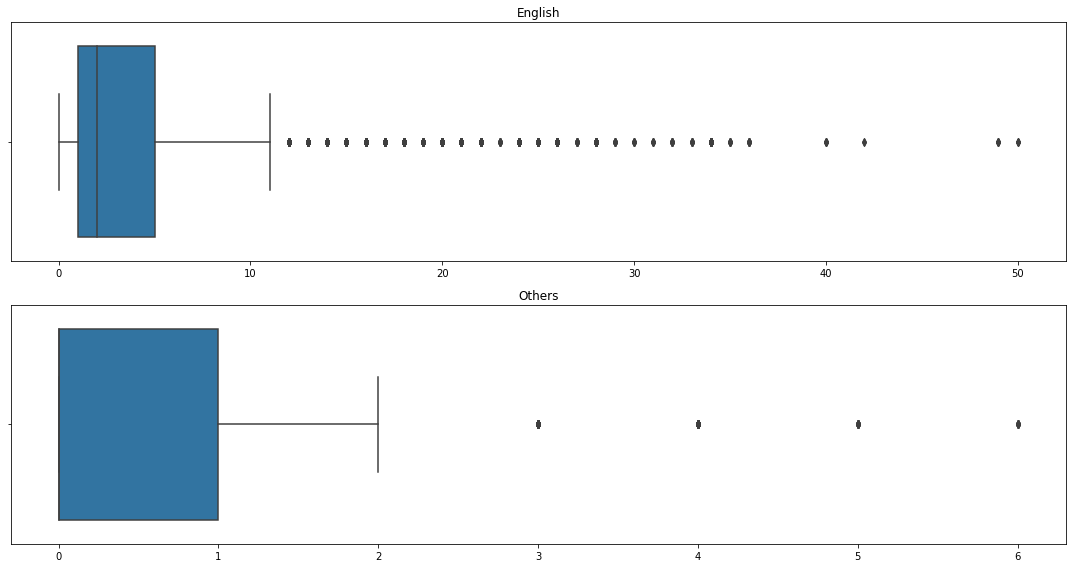

In [85]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8))

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_job_skills', data=df.loc[df['job_language'] == languages[i]], ax=ax)
    ax.set_title(languages[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

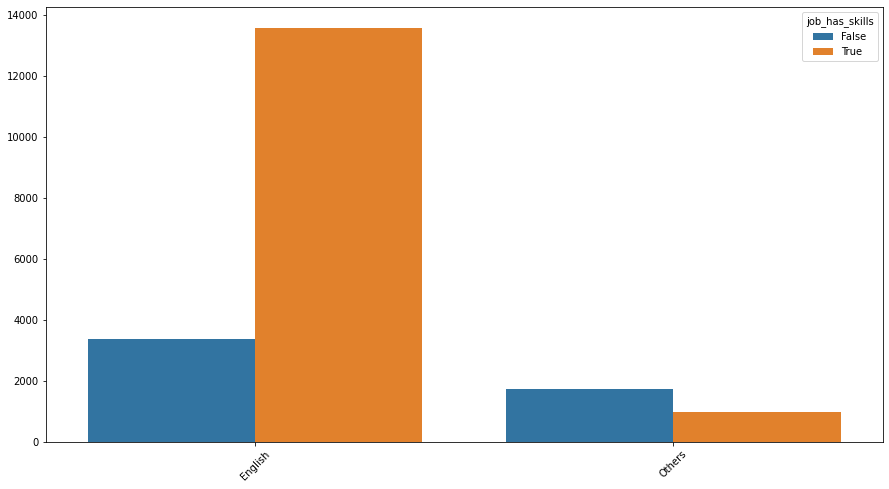

In [86]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='job_language', hue='job_has_skills', data=df, order=languages)
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('');

## Skills

### All Skills

In [87]:
lan_skills = {}

for lan in languages:
    lan_skills[lan] = get_skill_count(df.loc[df['job_language'] == lan], 'skills')

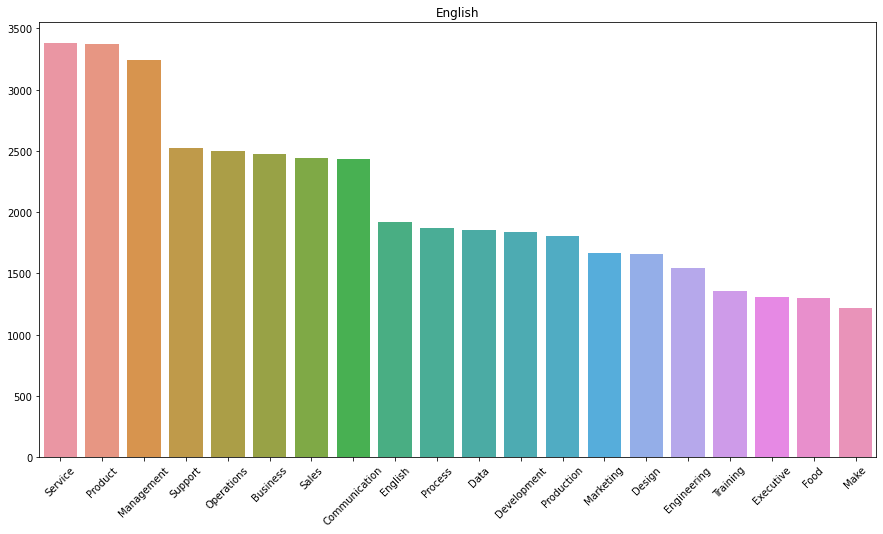

In [88]:
lan = languages[0]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=lan_skills[lan].iloc[:20])
ax.set_title(lan)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

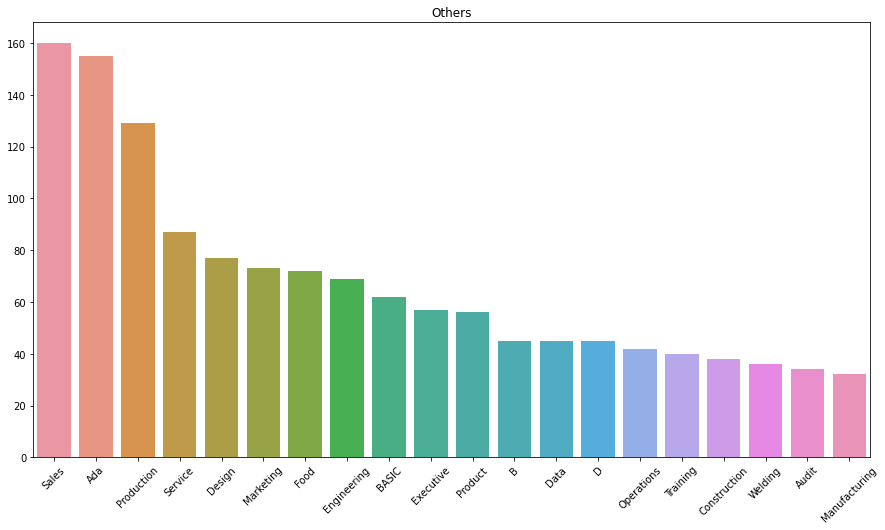

In [89]:
lan = languages[1]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=lan_skills[lan].iloc[:20])
ax.set_title(lan)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

### Job Skills

In [90]:
lan_skills = {}

for lan in languages:
    lan_skills[lan] = get_skill_count(df.loc[df['job_language'] == lan], 'job_skills')

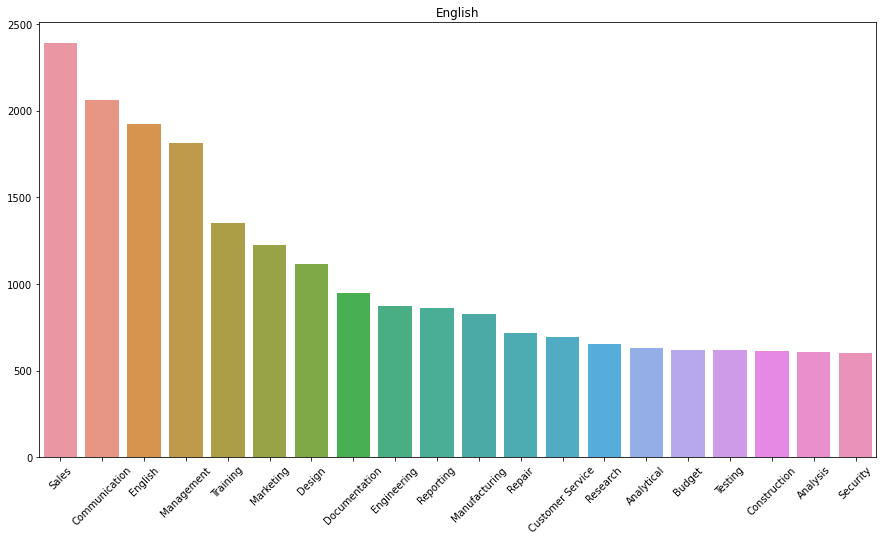

In [91]:
lan = languages[0]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=lan_skills[lan].iloc[:20])
ax.set_title(lan)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

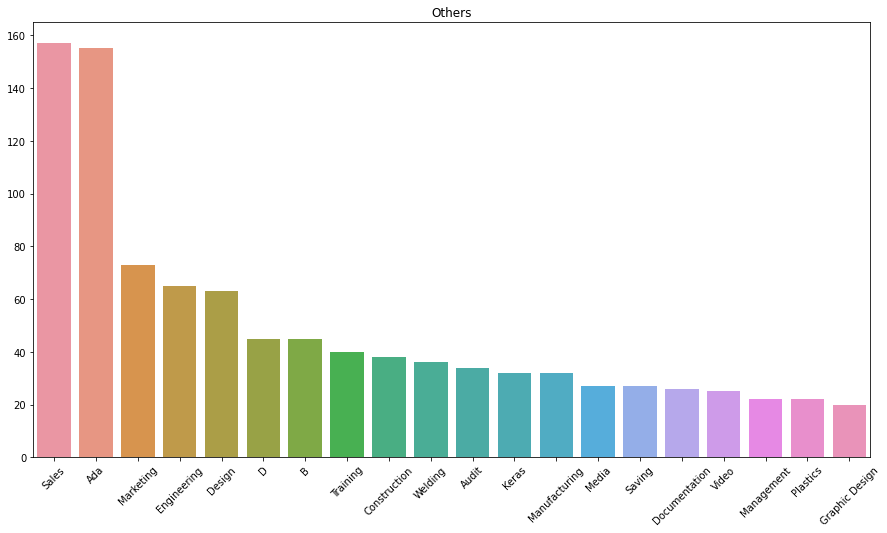

In [92]:
lan = languages[1]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', data=lan_skills[lan].iloc[:20])
ax.set_title(lan)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

# Has Skill Analysis

## Education

### All Skills

In [93]:
df.groupby('has_skills')['education'].value_counts(normalize=True) * 100

has_skills  education              
False       3 - SPM / O Level / SKM    41.938959
            5 - Diploma / DVM          23.734291
            6 - Bachelor's             19.425494
            2 - PMR / PT3               6.750449
            1 - Primary Education       4.380610
            4 - STPM / A Level          2.944345
            7 - Master's                0.502693
            8 - Doctoral (PhD)          0.323160
True        3 - SPM / O Level / SKM    40.822729
            5 - Diploma / DVM          25.332939
            6 - Bachelor's             20.248594
            2 - PMR / PT3               6.913288
            1 - Primary Education       3.663806
            4 - STPM / A Level          2.237348
            7 - Master's                0.485351
            8 - Doctoral (PhD)          0.295946
Name: education, dtype: float64

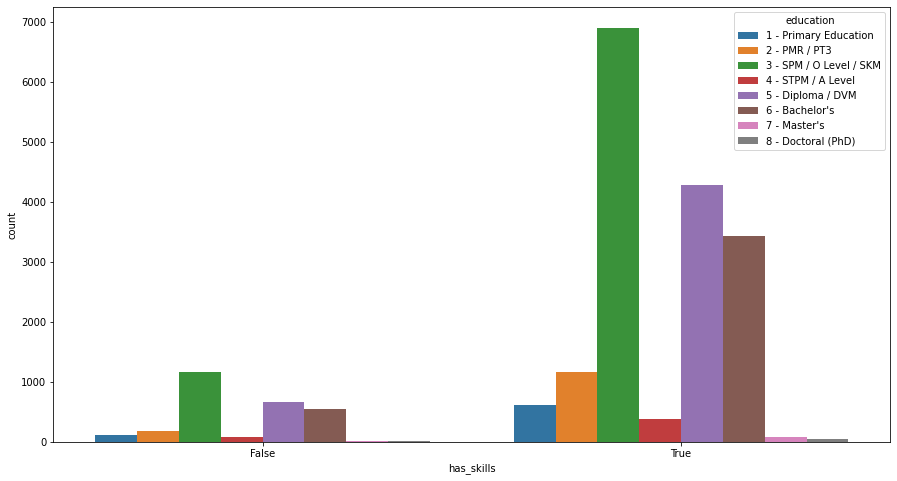

In [94]:
plt.figure(figsize=(15,8))
sns.countplot(x='has_skills', hue='education', data=df, hue_order=educations);

### Job Skills

In [95]:
df.groupby('job_has_skills')['education'].value_counts(normalize=True) * 100

job_has_skills  education              
False           3 - SPM / O Level / SKM    42.217442
                5 - Diploma / DVM          24.110285
                6 - Bachelor's             19.475948
                2 - PMR / PT3               6.648416
                1 - Primary Education       4.125929
                4 - STPM / A Level          2.600704
                7 - Master's                0.469300
                8 - Doctoral (PhD)          0.351975
True            3 - SPM / O Level / SKM    40.546478
                5 - Diploma / DVM          25.456543
                6 - Bachelor's             20.362488
                2 - PMR / PT3               6.975148
                1 - Primary Education       3.638610
                4 - STPM / A Level          2.244954
                7 - Master's                0.494302
                8 - Doctoral (PhD)          0.281477
Name: education, dtype: float64

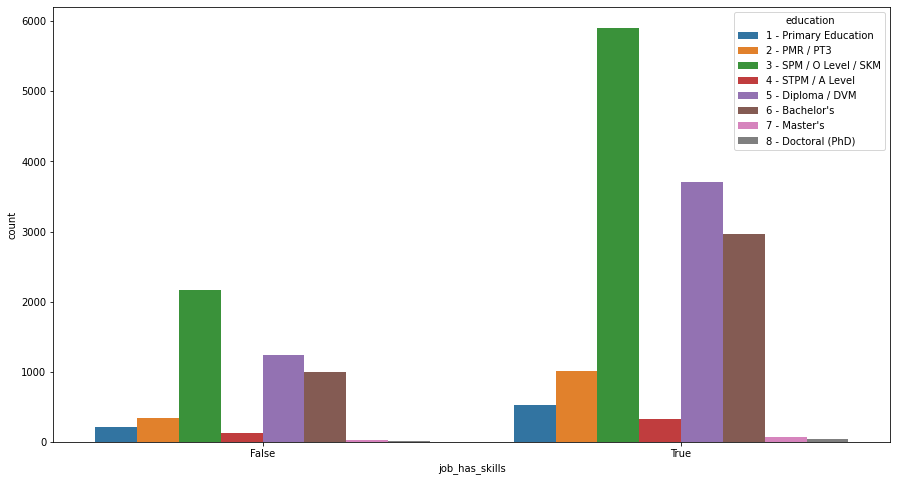

In [96]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_has_skills', hue='education', data=df, hue_order=educations);

### Ignore Skills

In [97]:
df.groupby('ignore_has_skills')['education'].value_counts(normalize=True) * 100

ignore_has_skills  education              
False              3 - SPM / O Level / SKM    40.855964
                   5 - Diploma / DVM          24.338261
                   6 - Bachelor's             19.869371
                   2 - PMR / PT3               7.339292
                   1 - Primary Education       4.125129
                   4 - STPM / A Level          2.612582
                   7 - Master's                0.567205
                   8 - Doctoral (PhD)          0.292197
True               3 - SPM / O Level / SKM    41.033040
                   5 - Diploma / DVM          25.429231
                   6 - Bachelor's             20.242389
                   2 - PMR / PT3               6.701775
                   1 - Primary Education       3.614197
                   4 - STPM / A Level          2.221902
                   7 - Master's                0.454480
                   8 - Doctoral (PhD)          0.302987
Name: education, dtype: float64

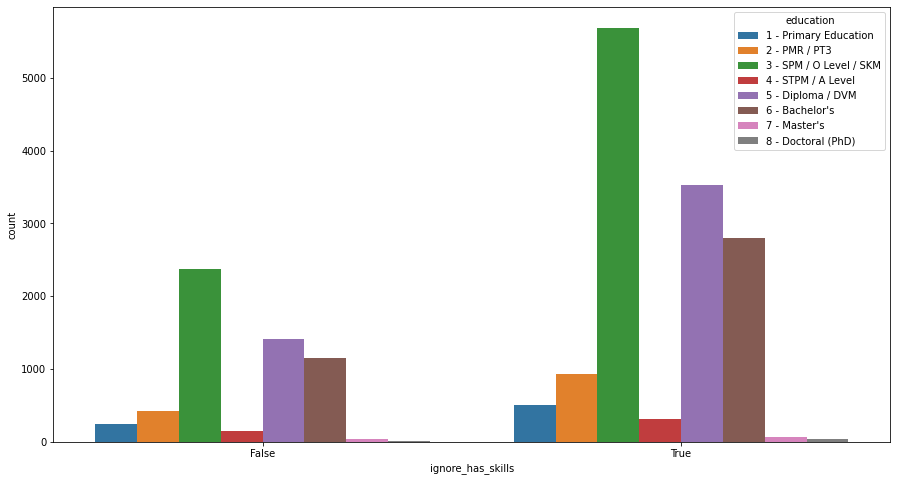

In [98]:
plt.figure(figsize=(15,8))
sns.countplot(x='ignore_has_skills', hue='education', data=df, hue_order=educations);

## Language

### All Skills

In [99]:
df.groupby('has_skills')['job_language'].value_counts(normalize=True) * 100

has_skills  job_language
False       Others          52.028725
            English         47.971275
True        English         92.417875
            Others           7.582125
Name: job_language, dtype: float64

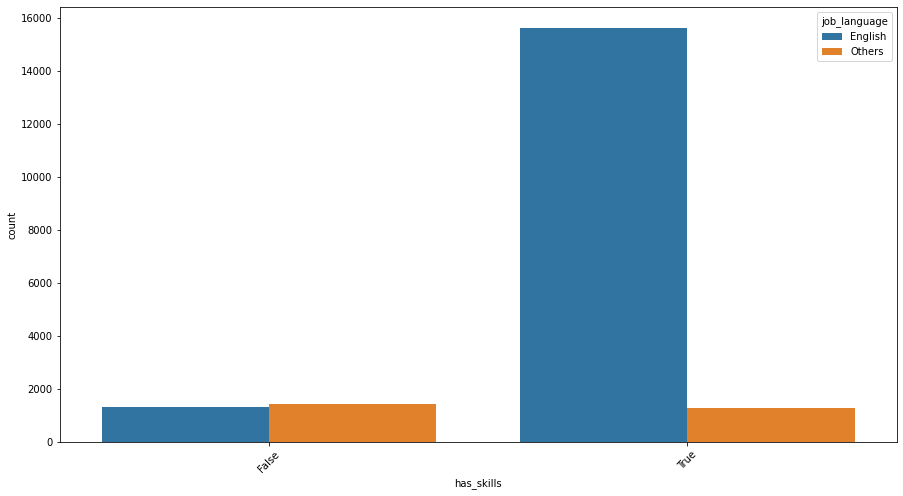

In [100]:
plt.figure(figsize=(15,8))
sns.countplot(x='has_skills', hue='job_language', data=df)
plt.xticks(rotation=45);

### Job Skills

In [101]:
df.groupby('job_has_skills')['job_language'].value_counts(normalize=True) * 100

job_has_skills  job_language
False           English         65.936645
                Others          34.063355
True            English         93.217081
                Others           6.782919
Name: job_language, dtype: float64

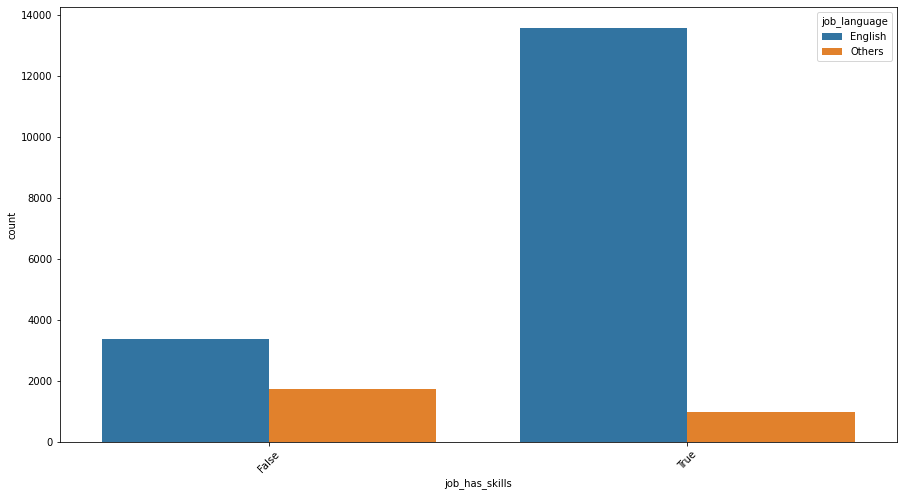

In [102]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_has_skills', hue='job_language', data=df)
plt.xticks(rotation=45);

### Ignore Skills

In [103]:
df.groupby('ignore_has_skills')['job_language'].value_counts(normalize=True) * 100

ignore_has_skills  job_language
False              English         63.870746
                   Others          36.129254
True               English         95.469629
                   Others           4.530371
Name: job_language, dtype: float64

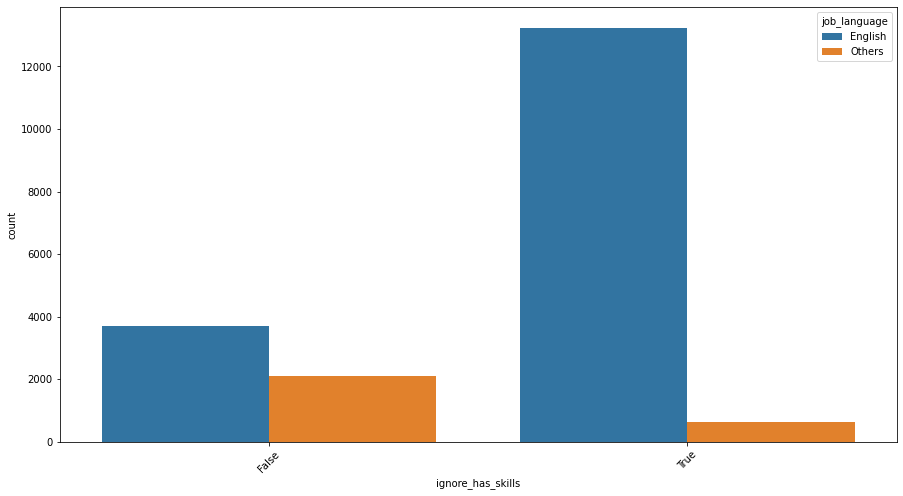

In [104]:
plt.figure(figsize=(15,8))
sns.countplot(x='ignore_has_skills', hue='job_language', data=df)
plt.xticks(rotation=45);

## Number of Skills

### Has (All) Skills

In [105]:
df.groupby('has_skills')[['no_skills', 'no_job_skills', 'no_ignore_skills']].describe().transpose()

has_skills               False         True 
no_skills        count  2785.0  16895.000000
                 mean      0.0      7.078485
                 std       0.0      8.068202
                 min       0.0      1.000000
                 25%       0.0      2.000000
                 50%       0.0      4.000000
                 75%       0.0      9.000000
                 max       0.0     70.000000
no_job_skills    count  2785.0  16895.000000
                 mean      0.0      4.247233
                 std       0.0      5.293954
                 min       0.0      0.000000
                 25%       0.0      1.000000
                 50%       0.0      2.000000
                 75%       0.0      5.000000
                 max       0.0     50.000000
no_ignore_skills count  2785.0  16895.000000
                 mean      0.0      2.831252
                 std       0.0      3.142109
                 min       0.0      0.000000
                 25%       0.0      1.000000
                 50%       0.0      2.000000
                 75%       0.0      4.000000
                 max       0.0     26.000000

In [106]:
df.groupby('has_skills')[['job_has_skills', 'ignore_has_skills']].describe()

job_has_skills                      ignore_has_skills         \
                    count unique    top   freq             count unique   
has_skills                                                                
False                2785      1  False   2785              2785      1   
True                16895      2   True  14566             16895      2   

                          
              top   freq  
has_skills                
False       False   2785  
True         True  13862

In [107]:
df.groupby('has_skills')['job_has_skills'].value_counts(normalize=True) * 100

has_skills  job_has_skills
False       False             100.000000
True        True               86.214856
            False              13.785144
Name: job_has_skills, dtype: float64

In [108]:
df.groupby('has_skills')['ignore_has_skills'].value_counts(normalize=True) * 100

has_skills  ignore_has_skills
False       False                100.000000
True        True                  82.047943
            False                 17.952057
Name: ignore_has_skills, dtype: float64

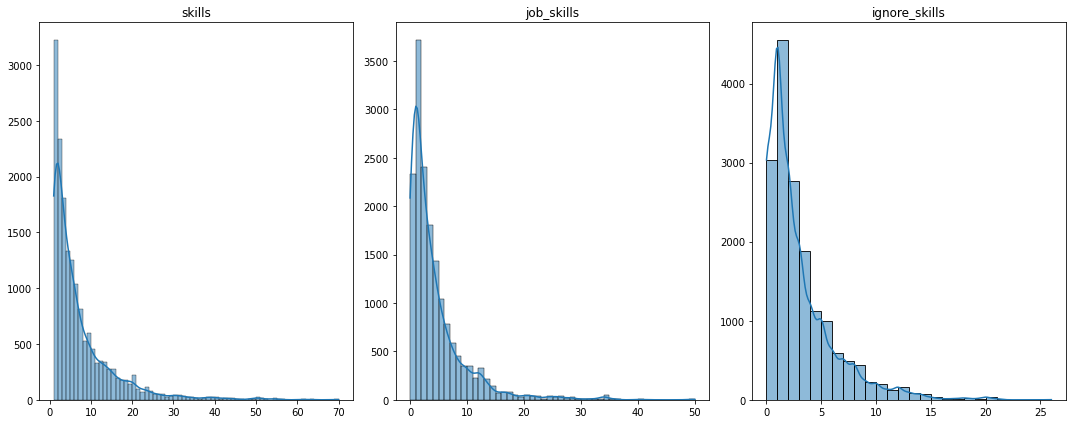

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_' + axis[i] + 'skills', data=df.loc[df['has_skills']], kde=True, binwidth=1, ax=ax)
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

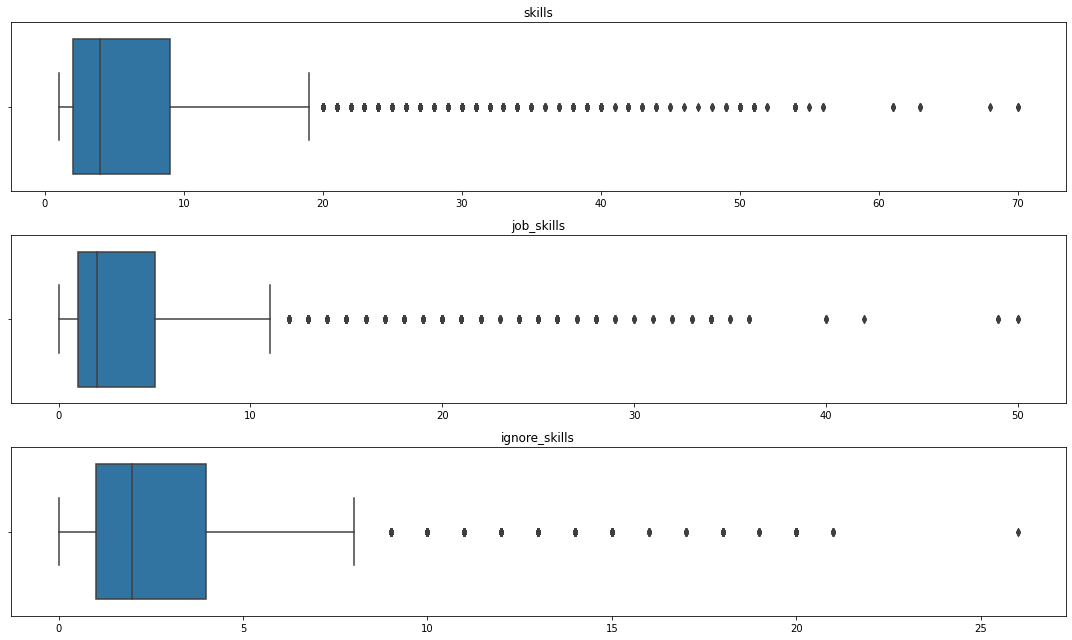

In [110]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,9))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_' + axis[i] + 'skills', data=df.loc[df['has_skills']], ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

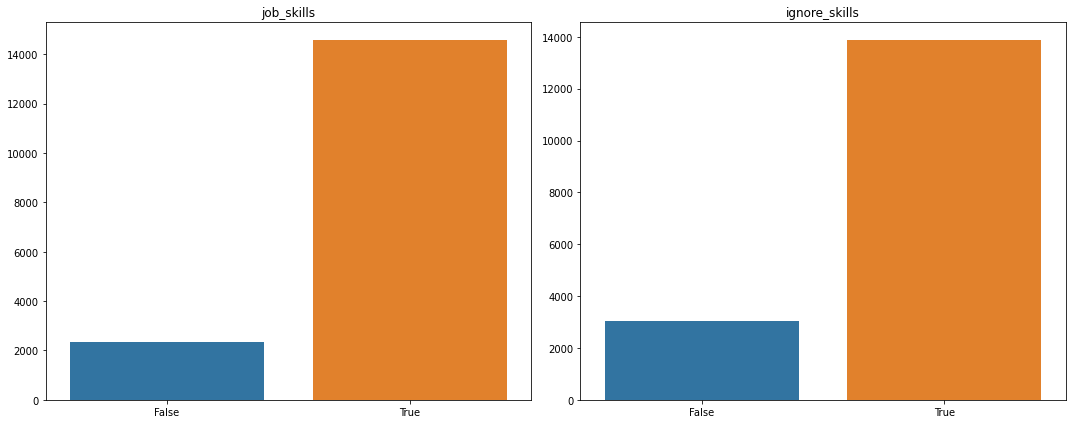

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axis = ['job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.countplot(x=axis[i] + 'has_skills', data=df.loc[df['has_skills']], ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

### Has Job Skills

In [112]:
df.groupby('job_has_skills')[['no_skills', 'no_job_skills', 'no_ignore_skills']].describe().transpose()

job_has_skills                False         True 
no_skills        count  5114.000000  14566.000000
                 mean      0.654869      7.980365
                 std       0.870204      8.337765
                 min       0.000000      1.000000
                 25%       0.000000      3.000000
                 50%       0.000000      5.000000
                 75%       1.000000     10.000000
                 max       5.000000     70.000000
no_job_skills    count  5114.000000  14566.000000
                 mean      0.000000      4.926335
                 std       0.000000      5.400156
                 min       0.000000      1.000000
                 25%       0.000000      1.000000
                 50%       0.000000      3.000000
                 75%       0.000000      6.000000
                 max       0.000000     50.000000
no_ignore_skills count  5114.000000  14566.000000
                 mean      0.654869      3.054030
                 std       0.870204      3.317489
                 min       0.000000      0.000000
                 25%       0.000000      1.000000
                 50%       0.000000      2.000000
                 75%       1.000000      4.000000
                 max       5.000000     26.000000

In [113]:
df.groupby('job_has_skills')[['has_skills', 'ignore_has_skills']].describe()

has_skills                      ignore_has_skills         \
                    count unique    top   freq             count unique   
job_has_skills                                                            
False                5114      2  False   2785              5114      2   
True                14566      1   True  14566             14566      2   

                              
                  top   freq  
job_has_skills                
False           False   2785  
True             True  11533

In [114]:
df.groupby('job_has_skills')['has_skills'].value_counts(normalize=True) * 100

job_has_skills  has_skills
False           False          54.45835
                True           45.54165
True            True          100.00000
Name: has_skills, dtype: float64

In [115]:
df.groupby('job_has_skills')['ignore_has_skills'].value_counts(normalize=True) * 100

job_has_skills  ignore_has_skills
False           False                54.458350
                True                 45.541650
True            True                 79.177537
                False                20.822463
Name: ignore_has_skills, dtype: float64

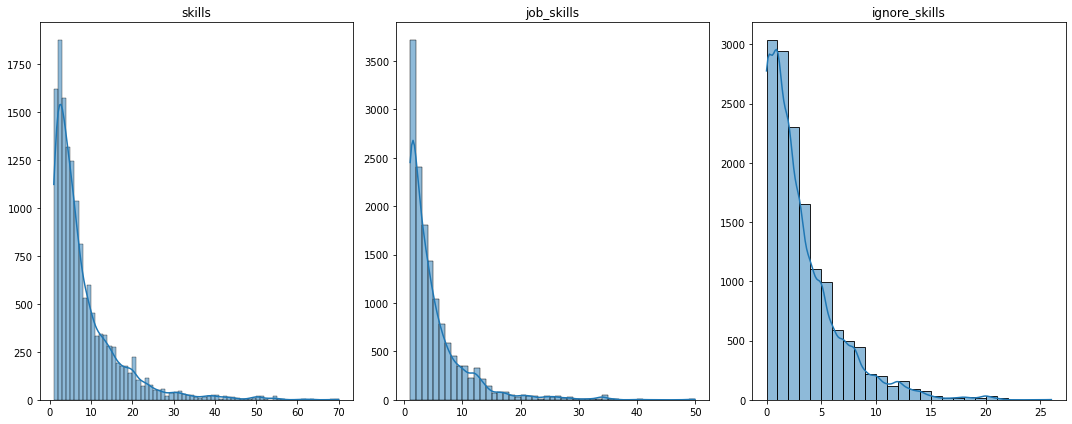

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_' + axis[i] + 'skills', data=df.loc[df['job_has_skills']], kde=True, binwidth=1, ax=ax)
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

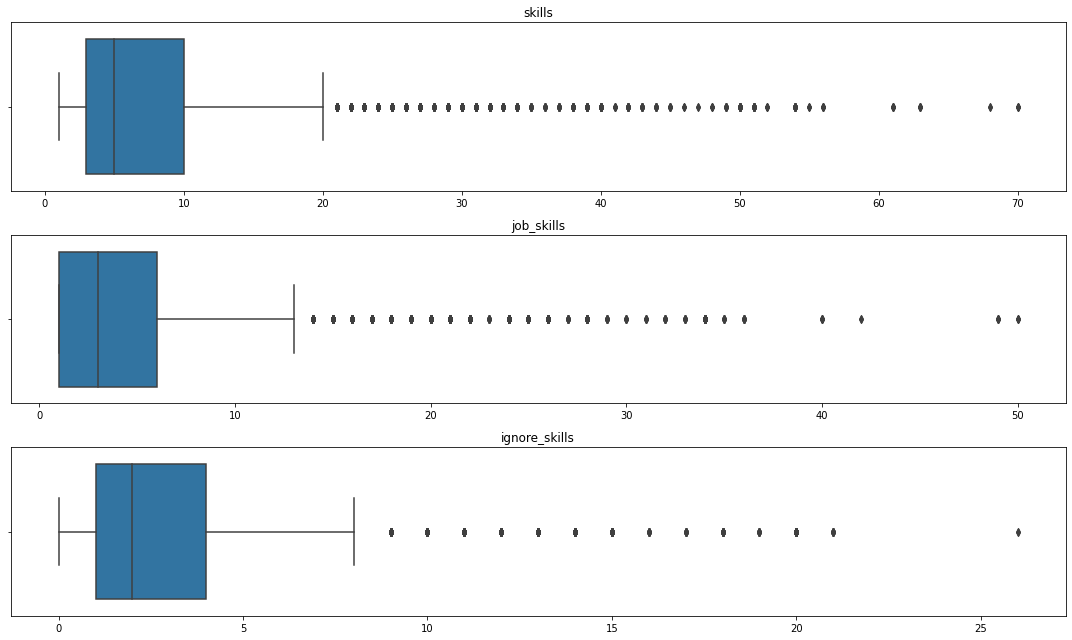

In [117]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,9))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_' + axis[i] + 'skills', data=df.loc[df['job_has_skills']], ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

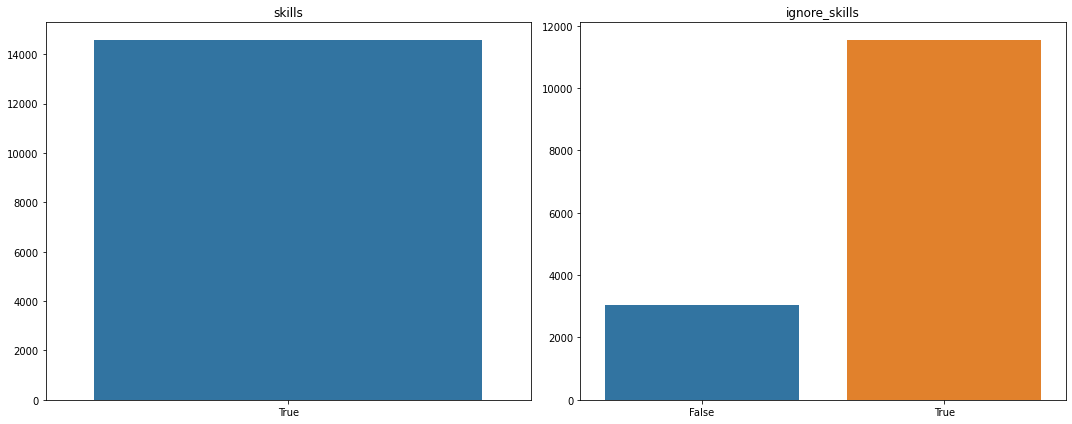

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axis = ['', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.countplot(x=axis[i] + 'has_skills', data=df.loc[df['job_has_skills']], ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

### Has Ignore Skills

In [119]:
df.groupby('ignore_has_skills')[['no_skills', 'no_job_skills', 'no_ignore_skills']].describe().transpose()

ignore_has_skills             False         True 
no_skills        count  5818.000000  13862.000000
                 mean      1.036611      8.192180
                 std       1.435640      8.484074
                 min       0.000000      1.000000
                 25%       0.000000      3.000000
                 50%       1.000000      5.000000
                 75%       1.000000     11.000000
                 max      10.000000     70.000000
no_job_skills    count  5818.000000  13862.000000
                 mean      1.036611      4.741451
                 std       1.435640      5.687440
                 min       0.000000      0.000000
                 25%       0.000000      1.000000
                 50%       1.000000      3.000000
                 75%       1.000000      6.000000
                 max      10.000000     50.000000
no_ignore_skills count  5818.000000  13862.000000
                 mean      0.000000      3.450729
                 std       0.000000      3.145692
                 min       0.000000      1.000000
                 25%       0.000000      1.000000
                 50%       0.000000      2.000000
                 75%       0.000000      5.000000
                 max       0.000000     26.000000

In [120]:
df.groupby('ignore_has_skills')[['has_skills', 'job_has_skills']].describe()

has_skills                     job_has_skills               \
                       count unique   top   freq          count unique   top   
ignore_has_skills                                                              
False                   5818      2  True   3033           5818      2  True   
True                   13862      1  True  13862          13862      2  True   

                          
                    freq  
ignore_has_skills         
False               3033  
True               11533

In [121]:
df.groupby('ignore_has_skills')['has_skills'].value_counts(normalize=True) * 100

ignore_has_skills  has_skills
False              True           52.131317
                   False          47.868683
True               True          100.000000
Name: has_skills, dtype: float64

In [122]:
df.groupby('ignore_has_skills')['job_has_skills'].value_counts(normalize=True) * 100

ignore_has_skills  job_has_skills
False              True              52.131317
                   False             47.868683
True               True              83.198673
                   False             16.801327
Name: job_has_skills, dtype: float64

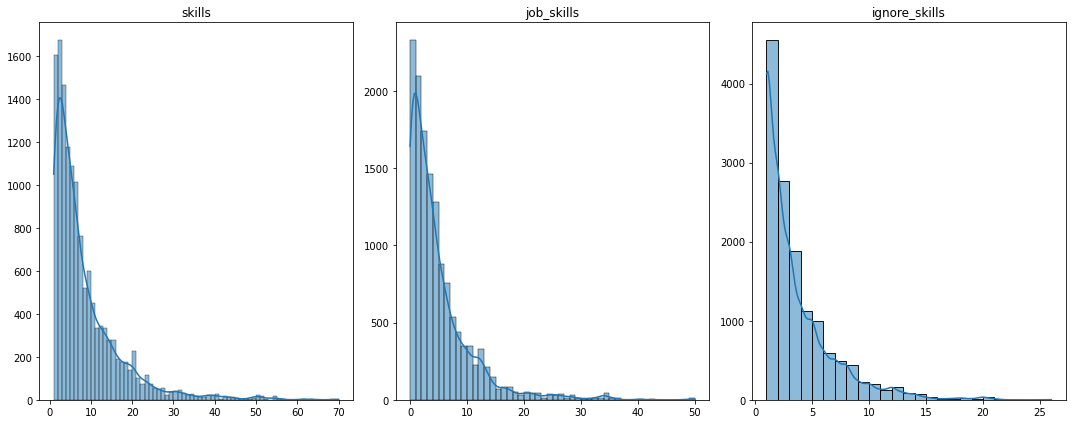

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.histplot(x='no_' + axis[i] + 'skills', data=df.loc[df['ignore_has_skills']], kde=True, binwidth=1, ax=ax)
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

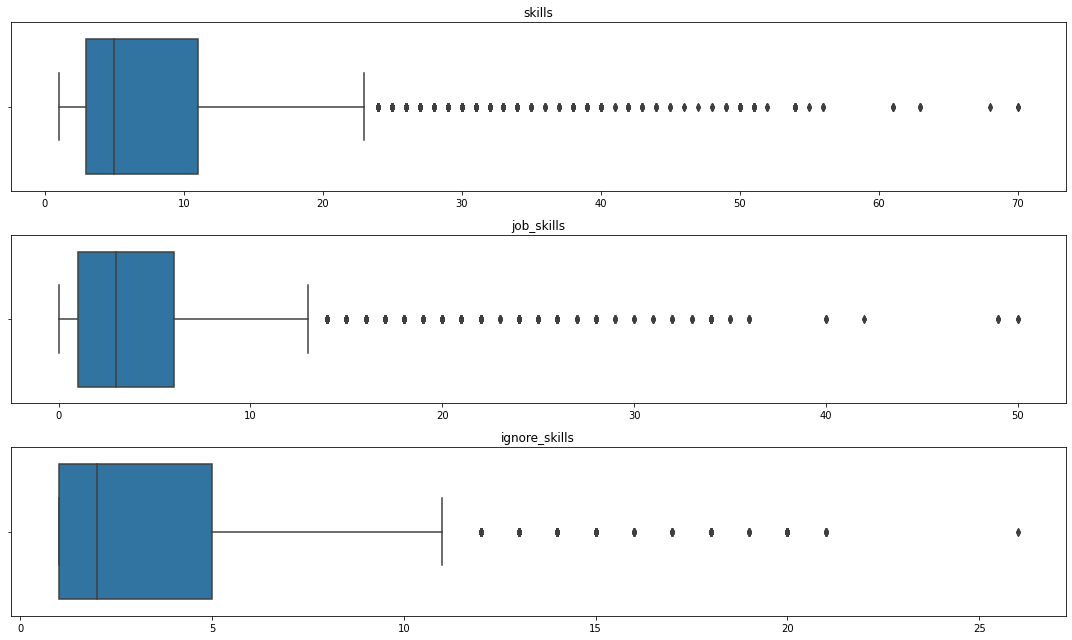

In [124]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,9))
axis = ['', 'job_', 'ignore_']

for i, ax in enumerate(fig.axes):
    sns.boxplot(x='no_' + axis[i] + 'skills', data=df.loc[df['ignore_has_skills']], ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

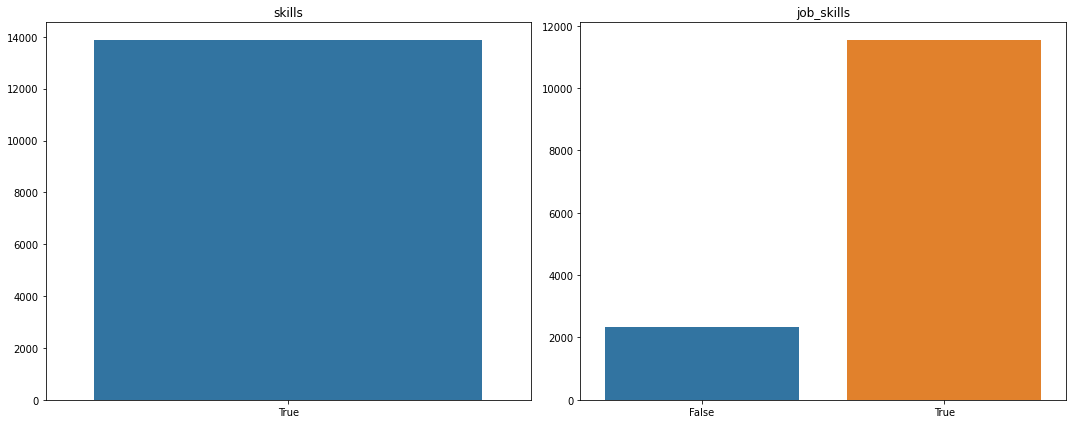

In [125]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axis = ['', 'job_']

for i, ax in enumerate(fig.axes):
    sns.countplot(x=axis[i] + 'has_skills', data=df.loc[df['ignore_has_skills']], ax=ax);
    ax.set_title(axis[i] + 'skills')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout();

# Skill Analysis

In [126]:
df_s1 = pd.DataFrame(columns=['index', 'count', 'education'])

for edu in educations:
    #df_temp = get_skill_count(df.loc[df['education'] == edu], 'job_skills').rename(columns={'count': edu})
    #df_s1 = df_s1.merge(df_temp, how='outer', on=['index'])
    df_temp = get_skill_count(df.loc[df['education'] == edu], 'job_skills')
    df_temp['education'] = edu
    df_s1 = df_s1.append(df_temp)

# df_s1['total'] = df_s1.sum(axis=1)
# df_s1 = df_s1.sort_values(by='total', ascending=False)
df_s1 = df_s1.set_index('index')
df_s1.head()

,count,education
index,,
Sales,87,1 - Primary Education
Communication,74,1 - Primary Education
English,69,1 - Primary Education
Management,62,1 - Primary Education
Engineering,41,1 - Primary Education


In [127]:
top_skills = df_s1.groupby('index').sum().sort_values(by='count', ascending=False)
top_skills.head()

,count,education
index,,
Sales,2546,1 - Primary Education2 - PMR / PT33 - SPM / O ...
Communication,2076,1 - Primary Education2 - PMR / PT33 - SPM / O ...
English,1932,1 - Primary Education2 - PMR / PT33 - SPM / O ...
Management,1837,1 - Primary Education2 - PMR / PT33 - SPM / O ...
Training,1394,1 - Primary Education2 - PMR / PT33 - SPM / O ...


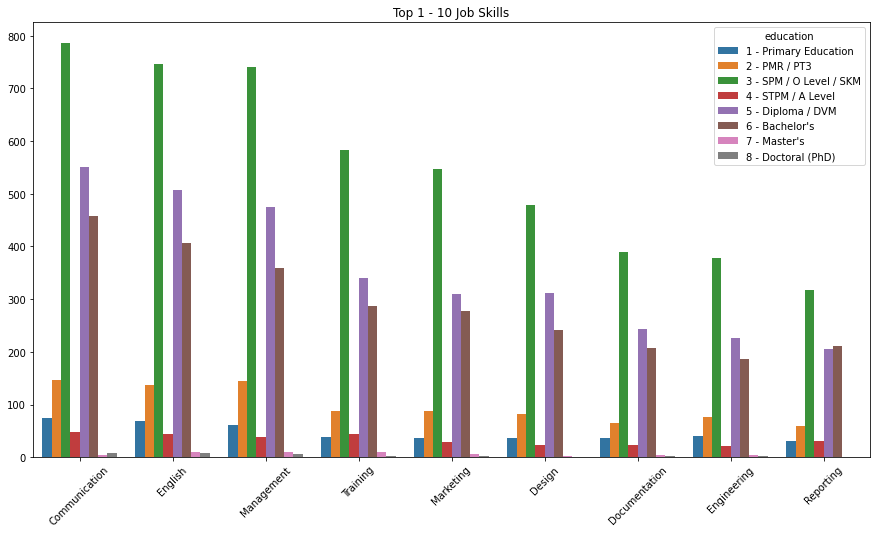

In [128]:
s, e = 1, 10
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', hue='education', data=df_s1.loc[top_skills.index[s:e]].reset_index())
ax.set_title('Top {} - {} Job Skills'.format(s, e))
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

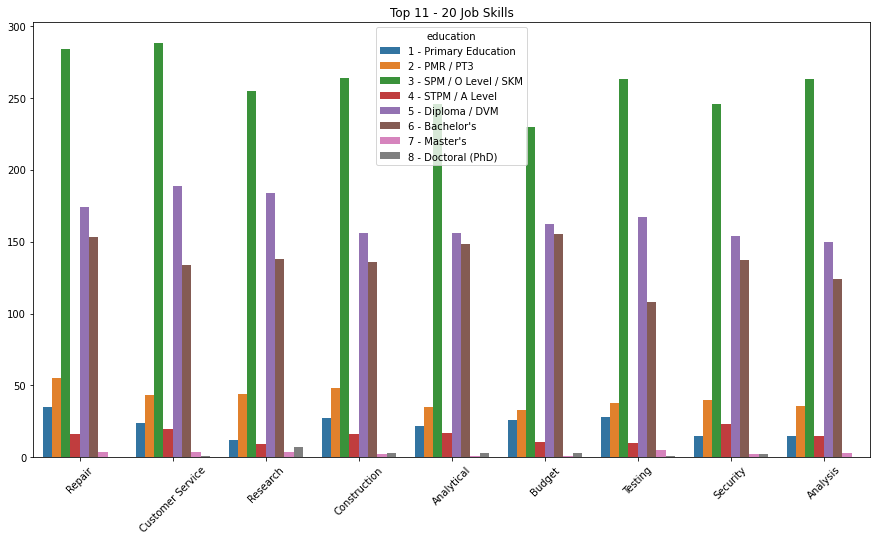

In [129]:
s, e = 11, 20
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', hue='education', data=df_s1.loc[top_skills.index[s:e]].reset_index())
ax.set_title('Top {} - {} Job Skills'.format(s, e))
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

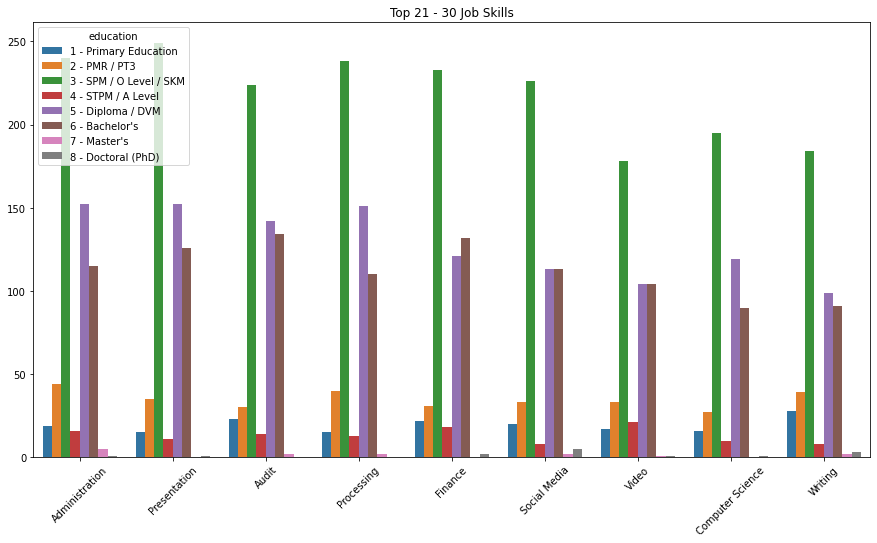

In [130]:
s, e = 21, 30
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', hue='education', data=df_s1.loc[top_skills.index[s:e]].reset_index())
ax.set_title('Top {} - {} Job Skills'.format(s, e))
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

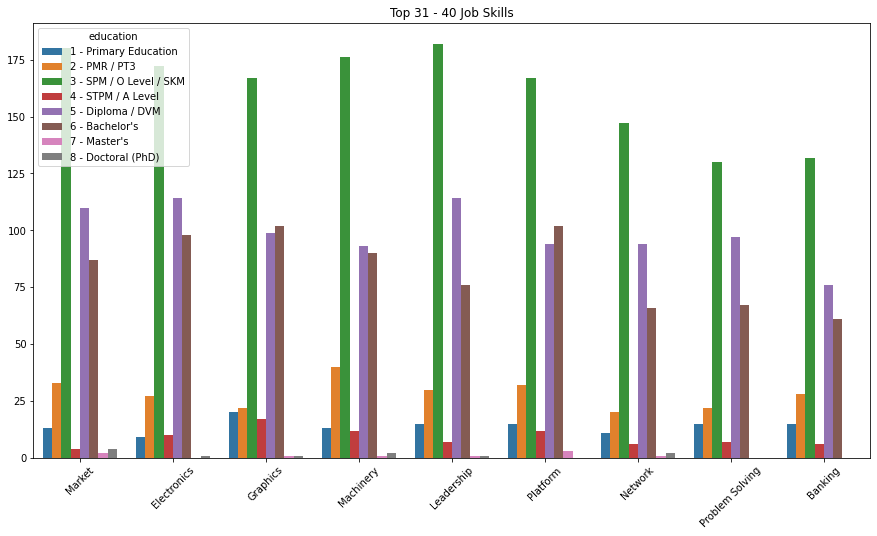

In [133]:
s, e = 31, 40
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', hue='education', data=df_s1.loc[top_skills.index[s:e]].reset_index())
ax.set_title('Top {} - {} Job Skills'.format(s, e))
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);

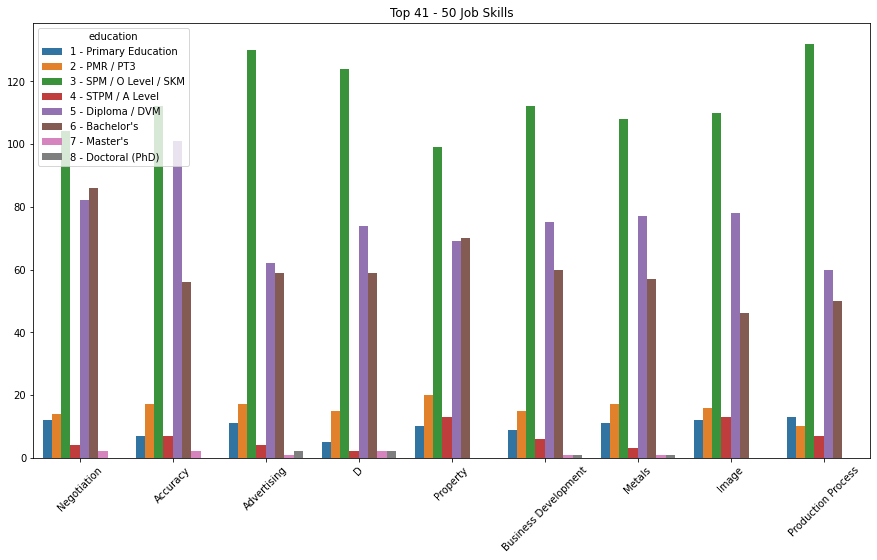

In [134]:
s, e = 41, 50
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='count', hue='education', data=df_s1.loc[top_skills.index[s:e]].reset_index())
ax.set_title('Top {} - {} Job Skills'.format(s, e))
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45);